# Домашнее задание №2

SQL-инъекция (SQLi) представляет собой одну из наиболее распространенных и опасных уязвимостей веб-приложений. Она возникает, когда злоумышленник вставляет вредоносные SQL-запросы в поля ввода пользовательских данных. Эти запросы могут позволить злоумышленнику получить несанкционированный доступ к базе данных, извлечь, изменить или удалить данные, а в некоторых случаях даже получить контроль над сервером.

Обнаружение и предотвращение SQL-инъекций крайне важно, поскольку такие атаки могут нанести значительный ущерб как бизнесу, так и пользователям. Традиционные методы защиты включают использование параметризованных запросов, подготовленных выражений и тщательную проверку и экранирование входных данных. Однако, несмотря на эти меры, уязвимости все же могут возникать из-за ошибок в программировании или человеческого фактора.

С развитием технологий машинного обучения (ML) появились новые подходы к обнаружению и предотвращению SQL-инъекций. Методы машинного обучения позволяют анализировать большие объемы данных и выявлять аномалии или подозрительные шаблоны, указывающие на попытку внедрения вредоносного SQL-запроса. Системы, основанные на ML, могут обучаться на исторических данных и адаптироваться к новым видам атак, что делает их мощным инструментом для обеспечения безопасности веб-приложений.

## Подготовка виртуального окружения Python

Предварительно нужно установить все зависимые модули. Все необходимые зависимости перечислены в requirements.txt файле. Чтобы установить зависимости, выполните в терминале следующую команду:

python3 -m pip install -r requirements.txt

## Описания задания

В данном задании мы постараемся изучить возможность детектирования SQL-инъекций на основе подхода обработки естественного языка (NLP) к анализу данных. Современные методы NLP позволяют эффективно обрабатывать и анализировать текстовые данные, выявляя закономерности и аномалии, которые могут ускользнуть от традиционных методов защиты.

Используя инструменты и методы NLP, мы будем анализировать текстовые входные данные веб-приложений, чаще всего передаваемый в полезной нагрузки прикладных протоколов, чтобы обнаружить подозрительные паттерны, характерные для SQL-инъекций. Это включает в себя такие техники, как токенизация (`RegexpTokenizer`), векторизация текста (`TfidfVectorizer`, `CountVectorizer`), предобработка данных (отброс несущественных токенов на основе анализа главных компонент),обучение моделей классификации.

В рамках работы вам предоставлено два размеченных датасета (`train-dataset.tsv` и `test-dataset.csv`)  с полезной нагрузкой в виде текста и метки 0 (легитимный текст) и 1 (payload содержащий sql инъекцию) 

Для выполнения домашнего задания вам необходимо:
1. Предустановить зависимости:
```shell
$ pip install -r requirements.txt
```
2. Загрузить исходный датасет `train-dataset.tsv` при помощи модуля `pandas` и разбить его на обучающий и тестовый набор данных: 
```python
source_df = pd.read_csv("datasets/train-dataset.tsv", sep='\t', engine='python')
df_train, df_test = train_test_split(source_df, test_size=0.5)
x_train, y_train = df_train['payload'].values, df_train['label'].values
x_test, y_test = df_test['payload'].values, df_test['label'].values
```

3. Извлечь токенезировать и векторизировать данные представленные в `train-dataset.tsv` при помощи инструментов `nltk.tokenize.RegexpTokenizer`, `sklearn.feature_extraction.text.TfidfVectorizer`, `sklearn.feature_extraction.text.CountVectorizer`

4. Выбрать ключевые, наиболее значемые токены при помощи инструментов `sklearn.feature_selection.SelectFromModel` и `sklearn.decomposition.TruncatedSVD`

5. Обучить модель на выбранных ключевых признаках

6. Протестировать обученную модель на тестовых данных из набора `train-dataset.tsv`

7. Подсчитать accuracy, построить матрицу ошибок

8. Загрузить тестовый датасет `test-dataset.tsv` при помощи модуля `pandas`:

9. Протестировать предобученную модель на новом наборе данных

10. Подсчитать accuracy, построить матрицу ошибок

11. Рассмотреть различные модели классификации, а также различные способы векторизации и токенизации данных, сравнить полученные результаты между собой

## Теоретический материал

Процесс машинного обучения моделей классификации позволяющих обнаруживать SQL инъекции можно свести к следующим этапам: 

#### 1. Предварительная обработка данных

Основная цель предварительной обработки данных — подготовить текстовые данные для дальнейшего анализа. Это включает следующие шаги:

- Токенизация: Разбиение текста на отдельные слова или фразы (токены).
- Очистка текста: Удаление лишних символов, знаков препинания, стоп-слов и приведение слов к нижнему регистру.
- Лемматизация или стемминг: Приведение слов к их начальной или базовой форме для уменьшения количества уникальных слов.


**RegexpTokenizer** (регулярный токенизатор) — это инструмент для разбиения текста на токены (слова или фразы) с использованием регулярных выражений. Регулярные выражения позволяют задавать сложные шаблоны для поиска и извлечения нужных частей текста.

#### 2. Векторизация данных

Наиболее простым споосбом векторизации является `CountVectorizer`:

`CountVectorizer` — это инструмент для преобразования текста в числовые векторы путем подсчета количества вхождений каждого слова в документ. В результате каждый документ представляется как вектор, где каждая позиция соответствует определенному слову, а значение в позиции — количество вхождений этого слова в документе.

Пример:

Документ 1: "SELECT * FROM users"
Документ 2: "DROP TABLE users"
Векторизация: [1, 1, 1, 0, 0] и [0, 0, 0, 1, 1]
где каждая позиция соответствует слову(токену) из словаря: ["SELECT", "*", "FROM", "DROP", "TABLE"].

Другим способом векторизации является `TfidfVectorizer`:

`TfidfVectorizer` (Term Frequency-Inverse Document Frequency Vectorizer) — это инструмент обработки текста, используемый для преобразования текстовых данных в числовые векторы на основе значимости слов. Этот метод учитывает как частоту появления слова в документе (term frequency, TF), так и обратную частоту появления слова во всех документах коллекции (inverse document frequency, IDF).

- TF (term frequency): измеряет частоту появления слова в документе. Обычно рассчитывается как отношение количества вхождений слова к общему количеству слов в документе: tf(t, d) = f(t, d) / sum(f(t', d) for t' in d)
- IDF (inverse document frequency): измеряет, насколько редким или распространенным является слово в коллекции документов. Рассчитывается как логарифм отношения общего количества документов к количеству документов, содержащих данное слово: idf(t) = log(N / df(t))

- Итоговый вес токена: tf-idf(t, d) = tf(t, d) * log(N / df(t))

#### 3. Отбор токенов (Отбор признаков)

Отбор токенов (или признаков) является важным шагом, который позволяет уменьшить размерность данных, улучшить производительность модели и избежать переобучения. Для этого используются различные методы, включая статистические и алгоритмические подходы:

- `SelectFromModel`: Метод для отбора признаков, основанный на важности признаков, которую определяет обученная модель. Например, можно использовать Lasso (линейная модель с L1-регуляризацией) для оценки важности признаков.

- `TruncatedSVD`: Метод понижения размерности, который применим к разреженным матрицам, например, к тем, которые получены с помощью `CountVectorizer` или `TfidfVectorizer`. `TruncatedSVD` уменьшает размерность данных, сохраняя наиболее важную информацию.

Также возможно комбинация данных методов, для повышения точности отбора признаков.

#### 4. Обучение модели

После векторизации текстовых данных их можно использовать для обучения моделей машинного обучения. Основные шаги включают:

- Разделение данных: Разделение данных на тренировочные и тестовые наборы.
- Выбор модели: Выбор алгоритма машинного обучения, такого как логистическая регрессия, случайный лес, метод опорных векторов (SVM) или нейронные сети.
- Обучение модели: Обучение модели на тренировочных данных с использованием векторизованных текстов.
- Оценка модели: Оценка точности и эффективности модели на тестовых данных с помощью метрик, таких как точность, полнота, F-мера.

#### 5. Обнаружение SQL-инъекций

После обучения модель можно использовать для классификации новых входных данных. При поступлении нового ввода текстовые данные проходят через этапы предварительной обработки и векторизации, после чего обученная модель определяет, является ли ввод подозрительным на наличие SQL-инъекций.
Преимущества подхода на основе NLP

- Адаптивность: Модели машинного обучения могут адаптироваться к новым типам атак, обучаясь на новых данных.
- Автоматизация: Системы на основе NLP могут автоматически анализировать и классифицировать большое количество входных данных, что повышает эффективность обнаружения уязвимостей.
- Точность: Использование методов векторизации, таких как TF-IDF, позволяет учитывать контекст и значимость слов, что улучшает точность классификации.

Использование методов NLP и машинного обучения для обнаружения SQL-инъекций представляет собой современный и эффективный подход, способный значительно повысить уровень безопасности веб-приложений. 

## Описание лабораторного стенда

#### Описание `FeatureExtractor` 
`FeatureExtractor` — класс, отвечающий за извлечение признаков (токенизацию и векторизацию данных) из исходных датафреймов. Имеет два метода:

`fit_extract` — анализирует предоставленные тексты и строит внутренние структуры данных, такие как словарь терминов (слов) и их IDF (inverse document frequency, обратная частота документа) значения. IDF вычисляется как логарифм отношения общего количества документов к количеству документов, содержащих данный термин, после чего преобразует текстовые данные в векторное представление на основе вычисленных векторов TF-IDF;

`extract_features` — выполняет только преобразование входных текстовых данных в соответствующие вектора TF-IDF с использованием уже обученных внутренних структур, таких как словарь терминов и IDF значения.

`FeatureExtractor` — поддерживает следующие режимы работы:

* TF-IDF ('tf-idf'):

    Описание: TF-IDF (Term Frequency-Inverse Document Frequency) — это метод вычисления веса слова в документе относительно его важности в коллекции документов.
    Применение: Каждый документ представляется в виде вектора, где каждая компонента отражает вес термина (слова), вычисленный по формуле TF-IDF. Этот метод учитывает и частоту встречаемости слова в документе (TF) и обратную частоту документа (IDF).
    Пример: Используется для извлечения ключевых признаков из текста, что полезно для задач, таких как классификация текстов, кластеризация и информационный поиск.

* TF-IDF с N-граммами ('tf-idf_ngram'):

    Описание: Этот режим также использует TF-IDF, но включает векторизацию не только отдельных слов, но и последовательностей из N смежных слов (N-грамм).
    Применение: Учитывает контекстуальные зависимости между последовательными словами, что может улучшить качество представления текста, особенно для задач, где важен порядок слов, например, в задачах машинного перевода или анализе sql запросов.

* Мешок слов ('bag_of_words'):

    Описание: Это простой метод векторизации, который представляет каждый документ в виде вектора, где каждая компонента соответствует наличию или отсутствию конкретного слова из словаря.
    Применение: Подходит для задач, где важно только наличие слова в тексте, а не его частота или важность. Обычно используется в моделях, требующих быстрое обучение и простоту интерпретации, таких как методы наивного Байеса или простые линейные модели.

* Мешок символов ('bag_of_characters'):

    Описание: Этот метод представляет текст в виде вектора, где каждая компонента соответствует наличию или отсутствию конкретного символа в тексте.
    Применение: Полезен в задачах, где важны структура или последовательность символов, таких как распознавание рукописного текста или анализ кодов программ. 

#### Описание `FeatureSelecter`
`FeatureSelecter` — класс, реализующий отбор ключевых токенов из общего набора. Отбор производится двумя комбинацией двух методов: SelectFromModel(Lasso) и TruncatedSVD.

`fit_transform` — Обучает SelectFromModel и TruncatedSVD модели на тренировочных данных. Преобразует тренировочные данные с использованием обученных моделей. Возвращает преобразованные тренировочные данные.

`transform` — выполняет только отбор токенов на основе работы предобученных моделей.


#### Описание `ModelFabric` 
`ModelFabric` — класс, предоставляющий единый интерфейс для создания моделей классификации данных

Поддерживает создание следующих моделей:
* XGBOOST
* SVC
* NU_SVC
* KNEIGHBORS
* DECISION_TREE
* RANDOM_FOREST
* ADABOOST
* BAGGING
* EXTRA_TREES
* LINEAR_SVC

In [2]:
import time
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize import RegexpTokenizer

import warnings

warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

In [3]:
class ExtractMethods:
    TF_IDF = 'tf-idf'
    TF_IDF_NGRAM = 'tf-idf_ngram'
    BAG_OF_WORDS = 'bag_of_words'
    BAG_OF_CHAR = 'bag_of_characters'


class FeatureExtractor:
    def __init__(self, method, *args, **kwargs):
        self.args = args
        self.kwargs = kwargs
        self.notes = {}
        self.vectorizer = self._get_vectorizer(method, args, kwargs)

    def _get_vectorizer(self, method, *args, **kwargs):
        token = RegexpTokenizer(r'[a-zA-Z0-9]+')
        match method:
            case ExtractMethods.TF_IDF:
                return TfidfVectorizer(tokenizer=token.tokenize, *self.args, **self.kwargs)
            case ExtractMethods.TF_IDF_NGRAM:
                return TfidfVectorizer(
                    lowercase=True, stop_words='english',
                    ngram_range=(1, 3),
                    tokenizer=token.tokenize, analyzer='char'
                )
            case ExtractMethods.BAG_OF_WORDS:
                return CountVectorizer(analyzer='word', **self.kwargs)
            case ExtractMethods.BAG_OF_CHAR:
                return CountVectorizer(analyzer='char', tokenizer=token.tokenize, **self.kwargs)
            case _:
                raise ValueError(f"Unknown feature extraction method: {self.method}")

    def fit_extract(self, x_train):
        return self.vectorizer.fit_transform(x_train)

    def extract_features(self, x):
        return self.vectorizer.transform(x)

In [4]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

In [5]:
class FeatureSelecter:
    def __init__(self, n_components):
        self._scaler = StandardScaler(with_mean=False)
        self._lasso_selecter = SelectFromModel(Lasso(alpha=0.001, random_state=10))
        self._pca = TruncatedSVD(n_components=n_components)

    def fit_transform(self, x_train, y_train):
        self._scaler.fit(x_train)
        self._lasso_selecter.fit(self._scaler.transform(x_train), y_train)
        self._pca.fit(self._lasso_selecter.transform(self._scaler.transform(x_train)))

        return self._pca.transform(self._lasso_selecter.transform(self._scaler.transform(x_train)))

    def transform(self, x):
        return self._pca.transform(self._lasso_selecter.transform(self._scaler.transform(x)))

In [6]:
import xgboost as xgb
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier

In [7]:
class Models:
    XGBOOST = 'XGBoost'
    SVC = 'SVC'
    NU_SVC = 'NuSVC'
    KNEIGHBORS = 'KNeighbors'
    DECISION_TREE = 'DecisionTree'
    RANDOM_FOREST = 'RandomForest'
    ADABOOST = 'AdaBoost'
    BAGGING = 'Bagging'
    EXTRA_TREES = 'ExtraTrees'
    LINEAR_SVC = 'LinearSVC'


class ModelFabric:
    @staticmethod
    def create_model(model_name, *args, **kwargs):
        match model_name:
            case Models.XGBOOST:
                return xgb.XGBClassifier(*args, **kwargs)
            case Models.SVC:
                return SVC(gamma=2, C=1, kernel='linear', *args, **kwargs)
            case Models.NU_SVC:
                return NuSVC( kernel='linear', *args, **kwargs)
            case Models.KNEIGHBORS:
                return KNeighborsClassifier(3, *args, **kwargs)
            case Models.DECISION_TREE:
                return DecisionTreeClassifier(max_depth=5, *args, **kwargs)
            case Models.RANDOM_FOREST:
                return RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, *args, **kwargs)
            case Models.ADABOOST:
                return AdaBoostClassifier(algorithm='SAMME', *args, **kwargs)
            case Models.BAGGING:
                return BaggingClassifier(*args, **kwargs)
            case Models.EXTRA_TREES:
                return ExtraTreesClassifier(*args, **kwargs)
            case Models.LINEAR_SVC:
                return LinearSVC(*args, **kwargs)
            case _:
                raise ValueError(f"Unsupported model name: {model_name}")


models_dict = {
    "XGBOOST": Models.XGBOOST,
    "SVC": Models.SVC,
    "NU_SVC": Models.NU_SVC,
    "KNEIGHBORS": Models.KNEIGHBORS,
    "DECISION_TREE": Models.DECISION_TREE,
    "RANDOM_FOREST": Models.RANDOM_FOREST,
    "ADABOOST": Models.ADABOOST,
    "BAGGING": Models.BAGGING,
    "EXTRA_TREES": Models.EXTRA_TREES,
    "LINEAR_SVC": Models.LINEAR_SVC
}

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix


def plot_confusion_matrix(y_expect, y_pred, method, model):
    cm = confusion_matrix(y_expect, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Normal', 'SQL-Injection'],
                yticklabels=['Normal', 'SQL-Injection'])
    plt.xlabel('Prediction', fontsize=13)
    plt.ylabel('Actual', fontsize=13)
    plt.title(f'Confusion Matrix method={method} model={model}', fontsize=17)
    plt.show()

### 2. Загрузим исходный датасет `train-dataset.tsv` при помощи модуля `pandas` и разобьем его на обучающий и тестовый набор данных:
    Метод train_test_split из библиотеки sklearn.model_selection используется для разделения данных на обучающую и тестовую выборки. Основная цель этого метода – разделить данные таким образом, чтобы часть данных использовалась для обучения модели, а другая часть – для тестирования эффективности этой модели на новых данных, которые модель ранее не видела.
    Основные параметры метода train_test_split
        * arrays – массивы данных, подлежащие разделению. Могут быть указаны как один массив, так и несколько массивов.
        * test_size – доля данных, выделяемых для тестового набора. Значение должно находиться в диапазоне от 0 до 1, где 0.5 означает, что 50% данных будут использоваться для обучения, а оставшиеся 50% – для теста.
        * random_state – целое число, задающее начальное состояние генератора псевдослучайных чисел. Это обеспечивает воспроизводимость результатов при многократном запуске программы.
        * shuffle – логическое значение, определяющее, следует ли перемешивать данные перед разделением.

In [9]:
source_df = pd.read_csv("datasets/train-dataset.tsv", sep='\t', engine='python')
df_train, df_test = train_test_split(source_df, test_size=0.5)
# Выделим из выборки для обучения df_train столбец payload в вектор x_train, а столбц label в вектор y_train
x_train, y_train = df_train['payload'].values, df_train['label'].values
# Выделим из тестовой выборки df_test столбец payload в вектор x_test, а столбц label в вектор y_test
x_test, y_test = df_test['payload'].values, df_test['label'].values

print(f"Размер обучающей выборки: {len(x_train)}, Размер тестовой выборки: {len(x_test)}")

Размер обучающей выборки: 15304, Размер тестовой выборки: 15305


### 3. Извлечь токенезировать и векторизировать данные представленные в `train-dataset.tsv` при помощи инструментов `nltk.tokenize.RegexpTokenizer`, `sklearn.feature_extraction.text.TfidfVectorizer`, `sklearn.feature_extraction.text.CountVectorizer`

#### 3.1. Выбор метода векторизации.
Выбор метода векторизации текста — важная задача, поскольку от правильного выбора метода зависят точность и эффективность последующих операций, таких как классификация, кластеризация и поиск информации. Рассмотрим основные методы векторизации и их преимущества.

TF-IDF — один из самых популярных методов векторизации, который объединяет частоту появления термина в документе с обратной частотой его появления в корпусе документов. Этот метод считается мощным благодаря своему умению выявлять важные термины, которые редко встречаются в большинстве документов, но часто встречаются в одном документе.

Метод TF-IDF_NGRAM — это расширение классического метода TF-IDF, которое включает в себя учет не только одиночных слов, но и последовательностей слов (n-grams). В отличие от обычного TF-IDF, который фокусируется исключительно на единицах лексического уровня (словах), TF-IDF_ngram добавляет дополнительный уровень внимания к последовательностям слов, что позволяет более точно учитывать контекст и смысл текста.

BoW — метод, который рассматривает документы как мешанину слов, где каждый уникальный термин рассматривается как единица, вне зависимости от порядка и контекста. BoW просто подсчитывает количество вхождений каждого термина.

Метод bag_of_characters — это один из подходов к векторизации текста, который фокусируется на уровне символов, а не слов. В отличие от более распространённых методов, таких как bag_of_words и TF-IDF, которые работают на уровне слов, bag_of_chars обрабатывает текст как последовательность символов.


In [10]:
attributes = dir(ExtractMethods)
methods = [getattr(ExtractMethods, attr) for attr in attributes if
           not callable(getattr(ExtractMethods, attr)) and not attr.startswith('__')]

for method in methods:
    print(method)

bag_of_characters
bag_of_words
tf-idf
tf-idf_ngram


##### 3.1.1. Инициализация экстрактора признаков для методов 'BAG_OF_CHAR', 'BAG_OF_WORDS', 'TF_IDF', 'TF_IDF_NGRAM'

In [11]:
extractors = {method: FeatureExtractor(method) for method in methods}

##### 3.1.2. Фитинг и трансформация обучающих данных для методов 'BAG_OF_CHAR', 'BAG_OF_WORDS', 'TF_IDF', 'TF_IDF_NGRAM'.

In [12]:
x_train_vectors = {method: extractors[method].fit_extract(x_train) for method in methods}


##### 3.1.3. Трансформация тестовых данных

In [13]:
x_test_vectors = {method: extractors[method].extract_features(x_test) for method in methods}


##### 3.1.4. Теперь у нас есть векторизованные данные, готовые для обучения модели

In [14]:
for method in methods:
    print(method, (int)(1 * (x_train_vectors[method].shape[0])), (int)(1 * (x_train_vectors[method].shape[1])),
          (int)(0.05 * (x_train_vectors[method].shape[1])))

bag_of_characters 15304 75 3
bag_of_words 15304 14688 734
tf-idf 15304 14721 736
tf-idf_ngram 15304 22639 1131


### 4. Выбрать ключевые, наиболее значемые токены при помощи инструментов `sklearn.feature_selection.SelectFromModel` и `sklearn.decomposition.TruncatedSVD`

#### 4.1 Инициализация объекта класса FeatureSelecter
Класс FeatureSelecter предназначен для выбора ключевых, наиболее значимых токенов с использованием методов Lasso и TruncatedSVD. Давайте пошагово разберём, как он работает и как его можно применить для получения значимых токенов.
Шаги работы класса FeatureSelecter
Стандартизация данных:
    * Класс использует StandardScaler для стандартизации данных. Стандартизация необходима для приведения всех признаков к одинаковым масштабам, что улучшает работу алгоритмов машинного обучения.
    * Отбор признаков с использованием Lasso: Алгоритм Lasso используется для отбора признаков методом регуляризации. Регуляризация Lasso способствует тому, что многие коэффициенты становятся равны нулю, тем самым исключая малозначимые признаки.
    * Уменьшение размерности с использованием TruncatedSVD: TruncatedSVD применяется для уменьшения размерности данных, сохраняя при этом важные аспекты вариации в данных. Это помогает избавиться от шума и упростить дальнейшую обработку данных.

##### Параметр n_components контролирует количество компонентов (измерений) в новом пространстве после преобразования. В частности, он отвечает за количество компонентов в результирующем пространстве после применения метода.
Контроль над этим параметром необходим для управления качеством сжатия данных. Чем меньше компонентов, тем сильнее сжимается пространство, но при этом увеличивается риск потери важной информации. Чем больше компонентов, тем точнее сохраняется информация, но увеличивается вычислительная сложность и затраты памяти.

In [15]:
method_components = {method: 20 for method in methods}
for method in method_components.keys():
    print(f"Метод: {method},", f" исходное количество измерений: {x_train_vectors[method].shape[1]}",
          f" итогово количтво компонент: {method_components[method]}")

Метод: bag_of_characters,  исходное количество измерений: 75  итогово количтво компонент: 20
Метод: bag_of_words,  исходное количество измерений: 14688  итогово количтво компонент: 20
Метод: tf-idf,  исходное количество измерений: 14721  итогово количтво компонент: 20
Метод: tf-idf_ngram,  исходное количество измерений: 22639  итогово количтво компонент: 20


In [16]:
selectors = {method: FeatureSelecter(n_components=method_components[method], ) for method in method_components.keys()}

#### 4.2 Применение fit_transform к обучающим данным.
Разделение на fit и transform:

fit: Этот метод обучает модель на данных, то есть находит параметры, которые будут использоваться для дальнейшего преобразования данных. Например, в случае с масштабированием данных он вычисляет среднее и стандартное отклонение, а в случае с методом уменьшения размерности (например, PCA) — компоненты.

transform: Этот метод применяет обученные параметры к данным, выполняя преобразование (например, масштабирование данных, снижение размерности или другие преобразования).


In [17]:
import datetime

x_train_reduced = {}
for method in methods:
    x_train_reduced[method] = selectors[method].fit_transform(x_train_vectors[method], y_train)
    print(
        f"{datetime.datetime.now()} Применение fit_transform к обучающим данным в разрезе медода векторизации: {method}. Размерность признаков: {x_train_reduced[method].shape[1]}")

2024-11-28 06:23:42.376342 Применение fit_transform к обучающим данным в разрезе медода векторизации: bag_of_characters. Размерность признаков: 20
2024-11-28 06:25:28.560401 Применение fit_transform к обучающим данным в разрезе медода векторизации: bag_of_words. Размерность признаков: 20
2024-11-28 06:27:13.732530 Применение fit_transform к обучающим данным в разрезе медода векторизации: tf-idf. Размерность признаков: 20
2024-11-28 06:30:41.250252 Применение fit_transform к обучающим данным в разрезе медода векторизации: tf-idf_ngram. Размерность признаков: 20


#### 4.3 Применение transform к тестовым данным из набора `train-dataset.tsv`


In [18]:
import datetime

x_test_reduced = {}
for method in methods:
    x_test_reduced[method] = selectors[method].transform(x_test_vectors[method])
    print(
        f"{datetime.datetime.now()} Применение transform к обучающим данным в разрезе медода векторизации: {method}. Размерность признаков: {x_test_reduced[method].shape[1]}")

2024-11-28 06:30:41.320369 Применение transform к обучающим данным в разрезе медода векторизации: bag_of_characters. Размерность признаков: 20
2024-11-28 06:30:41.324313 Применение transform к обучающим данным в разрезе медода векторизации: bag_of_words. Размерность признаков: 20
2024-11-28 06:30:41.327867 Применение transform к обучающим данным в разрезе медода векторизации: tf-idf. Размерность признаков: 20
2024-11-28 06:30:41.364152 Применение transform к обучающим данным в разрезе медода векторизации: tf-idf_ngram. Размерность признаков: 20


#### 4.4. Размерность отобранных признаков

In [19]:
for method in methods:
    print(f'Размерность признаков для {method}: {x_train_reduced[method].shape}')
    print(f'Размерность признаков для {method}: {x_test_reduced[method].shape}')

Размерность признаков для bag_of_characters: (15304, 20)
Размерность признаков для bag_of_characters: (15305, 20)
Размерность признаков для bag_of_words: (15304, 20)
Размерность признаков для bag_of_words: (15305, 20)
Размерность признаков для tf-idf: (15304, 20)
Размерность признаков для tf-idf: (15305, 20)
Размерность признаков для tf-idf_ngram: (15304, 20)
Размерность признаков для tf-idf_ngram: (15305, 20)


### 5. Обучить модель на выбранных ключевых признаках

#### 5.1 XGBoost — это библиотека для градиентного бустинга деревьев решений. Она известна своей скоростью и точностью, особенно в соревнованиях по машинному обучению.

#### 5.1 RandomForest — это ансамбль деревьев решений, который строит множество деревьев и усредняет результаты.

In [20]:
# Функция для вывода точности и матрицы ошибок (если необходимо)
def info_accuracy(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")


    cm = confusion_matrix(y_true, y_pred)
    print("Количество:")
    print(
            "\n".join(
                (
                    f"• легитимных текстов: {cm[0][0]}",
                    f"• SQL-инъекций: {cm[1][1]}",
                    f"• ложных срабатываний: {cm[0][1]}",
                    f"• пропущенных SQL-инъекций: {cm[1][0]}",
                )
            )
        )


In [21]:
from sklearn.feature_selection import SequentialFeatureSelector

# Инициализация словарей для хранения результатов
x_train_model = {}
x_test_model = {}
selector = {}

# Перебор методов
for method in methods:
    # Инициализируем словари для текущего метода
    x_train_model[method] = {}
    x_test_model[method] = {}
    selector[method] = {}
    model = {}

    # Перебор моделей из модели в models_dict
    for model_name in models_dict.keys():
        # Создание модели через ModelFabric
        model[model_name] = ModelFabric.create_model(models_dict[model_name])

        # Инициализация SelectFromModel для отбора признаков
        if models_dict[model_name] == Models.KNEIGHBORS:
            selector[method][model_name] = SequentialFeatureSelector(model[model_name], n_features_to_select='auto')
        elif models_dict[model_name] == Models.BAGGING:
            estimator = RandomForestClassifier()
            estimator.fit(x_train_reduced[method], y_train)
            selector[method][model_name] = SelectFromModel(estimator=estimator, prefit=True)
        else:
            selector[method][model_name] = SelectFromModel(model[model_name], prefit=False, threshold="mean")

        selector[method][model_name].fit(x_train_reduced[method], y_train)

        # Преобразование обучающих и тестовых данных с использованием отобранных признаков
        x_train_model[method][model_name] = selector[method][model_name].transform(x_train_reduced[method])
        x_test_model[method][model_name] = selector[method][model_name].transform(x_test_reduced[method])

# Вывод размеров новых датасетов
print(f"Размеры датасетов после отбора признаков:")
for method in methods:
    # Перебор моделей из модели в models_dict
    for model_name in models_dict.keys():
        print(f"• {method} {model_name} для тренировки: {x_train_model[method][model_name].shape}")
        print(f"• {method} {model_name} для тестирования: {x_test_model[method][model_name].shape}")


Размеры датасетов после отбора признаков:
• bag_of_characters XGBOOST для тренировки: (15304, 4)
• bag_of_characters XGBOOST для тестирования: (15305, 4)
• bag_of_characters SVC для тренировки: (15304, 5)
• bag_of_characters SVC для тестирования: (15305, 5)
• bag_of_characters NU_SVC для тренировки: (15304, 6)
• bag_of_characters NU_SVC для тестирования: (15305, 6)
• bag_of_characters KNEIGHBORS для тренировки: (15304, 10)
• bag_of_characters KNEIGHBORS для тестирования: (15305, 10)
• bag_of_characters DECISION_TREE для тренировки: (15304, 3)
• bag_of_characters DECISION_TREE для тестирования: (15305, 3)
• bag_of_characters RANDOM_FOREST для тренировки: (15304, 5)
• bag_of_characters RANDOM_FOREST для тестирования: (15305, 5)
• bag_of_characters ADABOOST для тренировки: (15304, 8)
• bag_of_characters ADABOOST для тестирования: (15305, 8)
• bag_of_characters BAGGING для тренировки: (15304, 4)
• bag_of_characters BAGGING для тестирования: (15305, 4)
• bag_of_characters EXTRA_TREES для тр

In [22]:
classifier = {}
for method in methods:
    classifier[method] = {}
    # Перебор моделей из модели в models_dict
    for model_name in models_dict.keys():
        #  Инициализация классификатора
        classifier[method][model_name] = ModelFabric.create_model(models_dict[model_name])
        # Обучение модели на выбранных признаках
        classifier[method][model_name].fit(x_train_model[method][model_name], y_train)

Accuracy: 0.9762
Количество:
• легитимных текстов: 146
• SQL-инъекций: 5535
• ложных срабатываний: 146
• пропущенных SQL-инъекций: 219


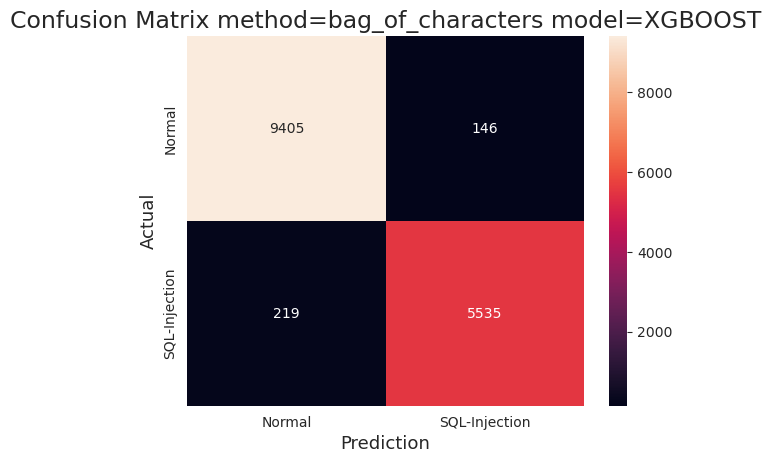

Accuracy: 0.9311
Количество:
• легитимных текстов: 396
• SQL-инъекций: 5096
• ложных срабатываний: 396
• пропущенных SQL-инъекций: 658


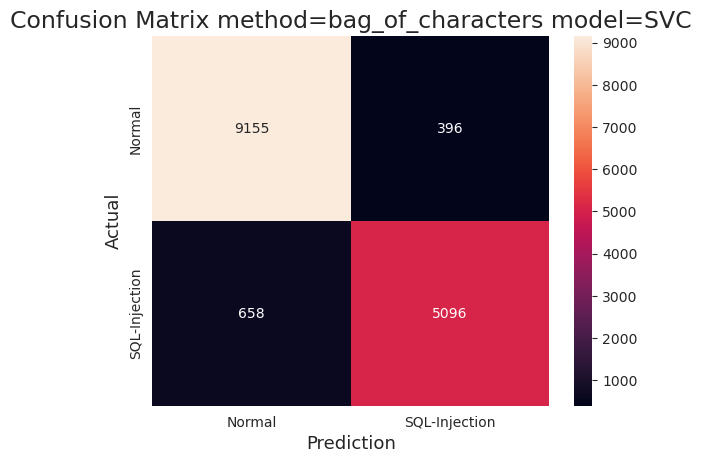

Accuracy: 0.8715
Количество:
• легитимных текстов: 110
• SQL-инъекций: 3897
• ложных срабатываний: 110
• пропущенных SQL-инъекций: 1857


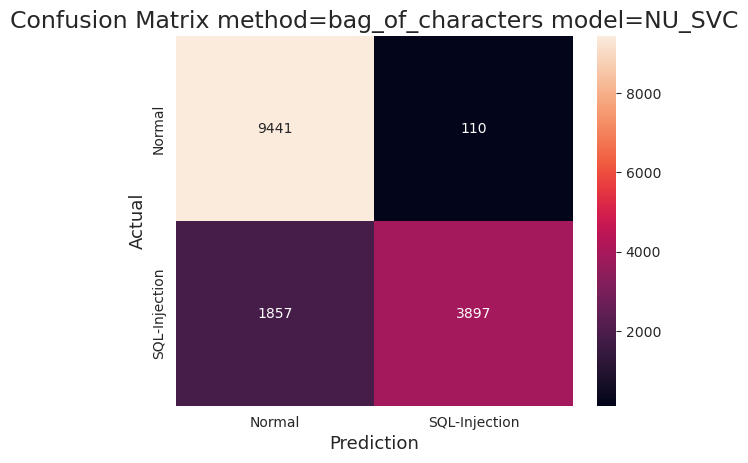

Accuracy: 0.9912
Количество:
• легитимных текстов: 24
• SQL-инъекций: 5644
• ложных срабатываний: 24
• пропущенных SQL-инъекций: 110


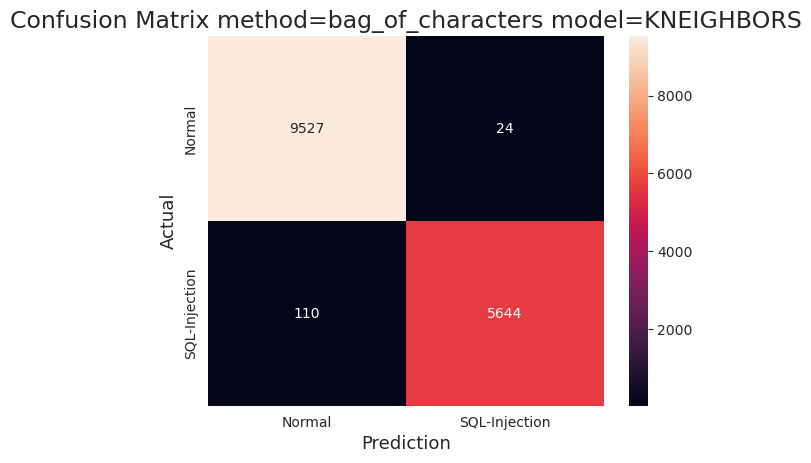

Accuracy: 0.9328
Количество:
• легитимных текстов: 176
• SQL-инъекций: 4901
• ложных срабатываний: 176
• пропущенных SQL-инъекций: 853


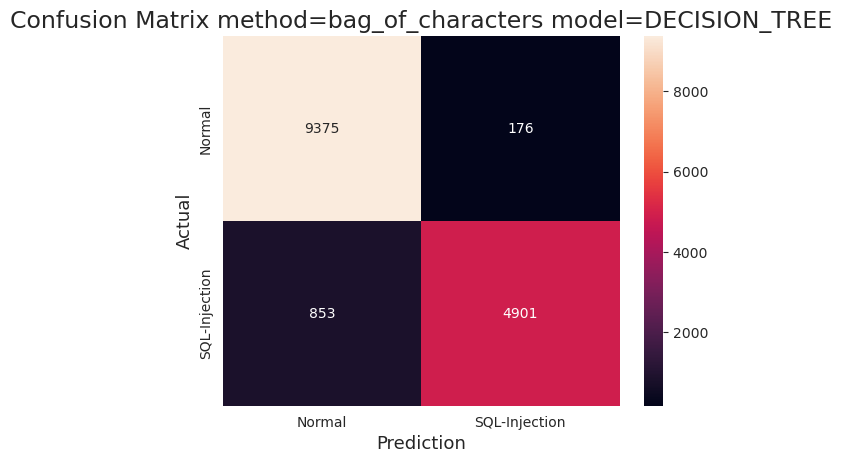

Accuracy: 0.9209
Количество:
• легитимных текстов: 239
• SQL-инъекций: 4783
• ложных срабатываний: 239
• пропущенных SQL-инъекций: 971


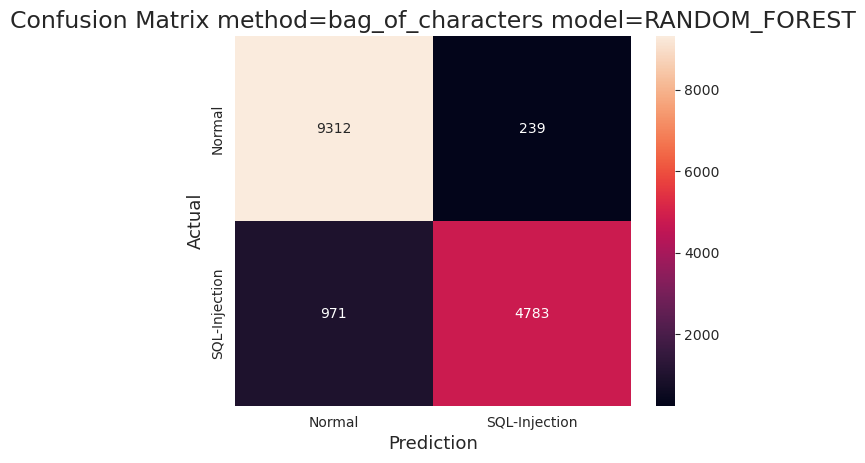

Accuracy: 0.9403
Количество:
• легитимных текстов: 303
• SQL-инъекций: 5143
• ложных срабатываний: 303
• пропущенных SQL-инъекций: 611


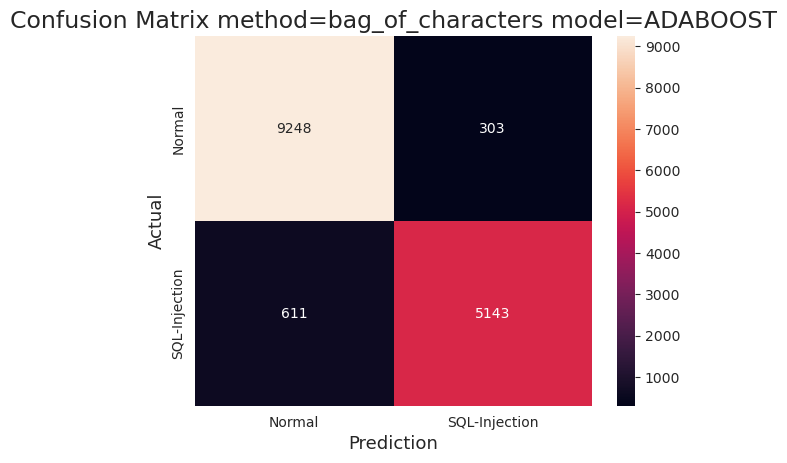

Accuracy: 0.9722
Количество:
• легитимных текстов: 164
• SQL-инъекций: 5492
• ложных срабатываний: 164
• пропущенных SQL-инъекций: 262


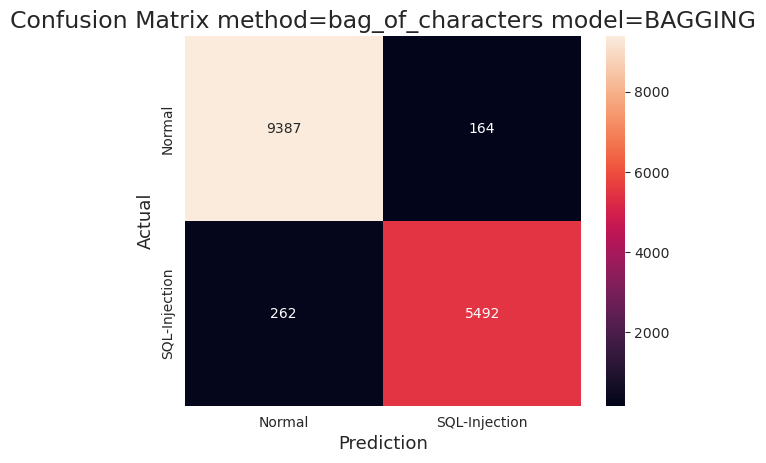

Accuracy: 0.9843
Количество:
• легитимных текстов: 64
• SQL-инъекций: 5577
• ложных срабатываний: 64
• пропущенных SQL-инъекций: 177


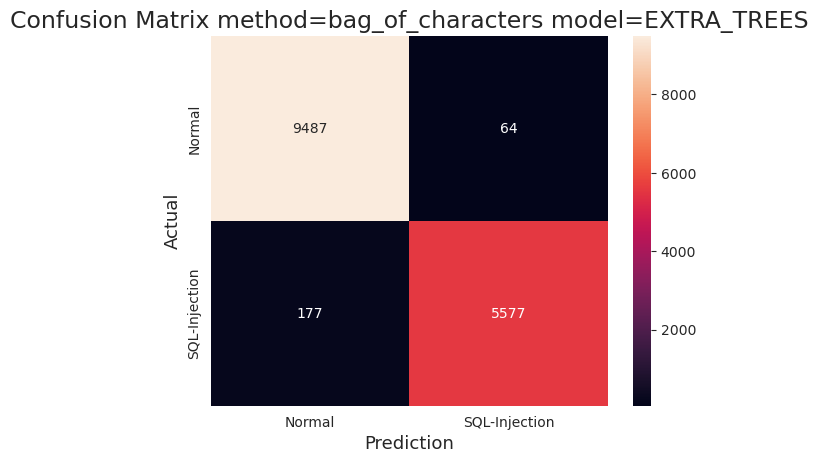

Accuracy: 0.9381
Количество:
• легитимных текстов: 283
• SQL-инъекций: 5089
• ложных срабатываний: 283
• пропущенных SQL-инъекций: 665


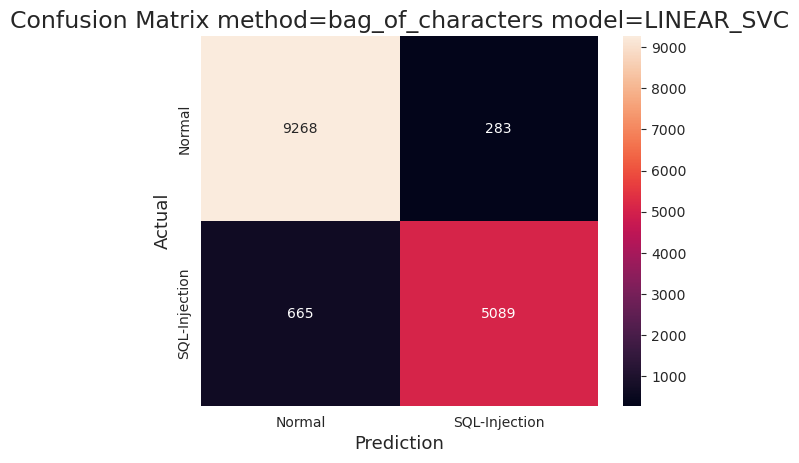

Accuracy: 0.9764
Количество:
• легитимных текстов: 146
• SQL-инъекций: 5539
• ложных срабатываний: 146
• пропущенных SQL-инъекций: 215


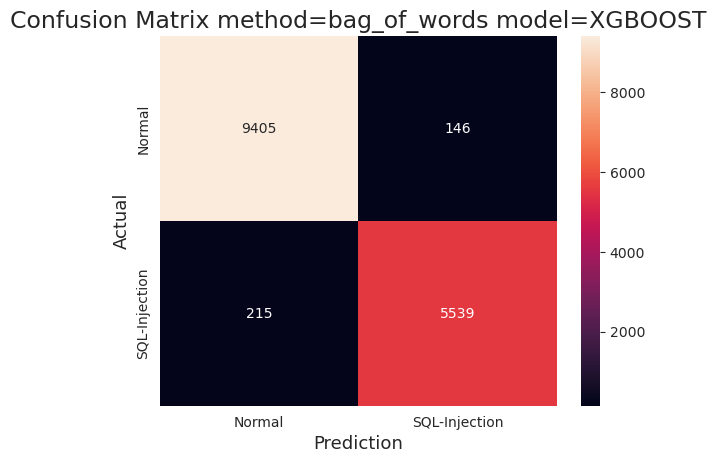

Accuracy: 0.9411
Количество:
• легитимных текстов: 207
• SQL-инъекций: 5059
• ложных срабатываний: 207
• пропущенных SQL-инъекций: 695


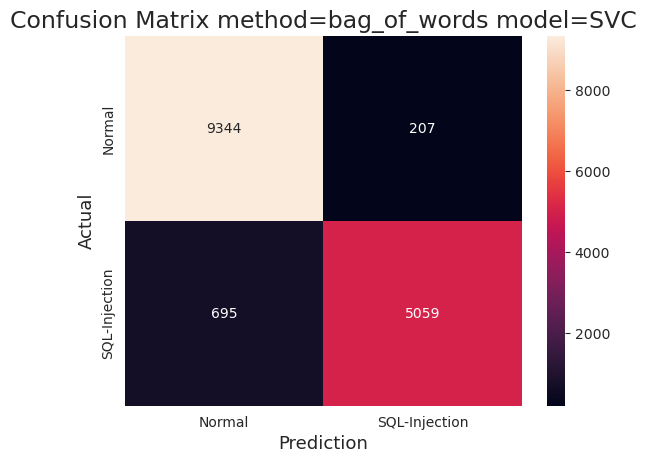

Accuracy: 0.8183
Количество:
• легитимных текстов: 59
• SQL-инъекций: 3032
• ложных срабатываний: 59
• пропущенных SQL-инъекций: 2722


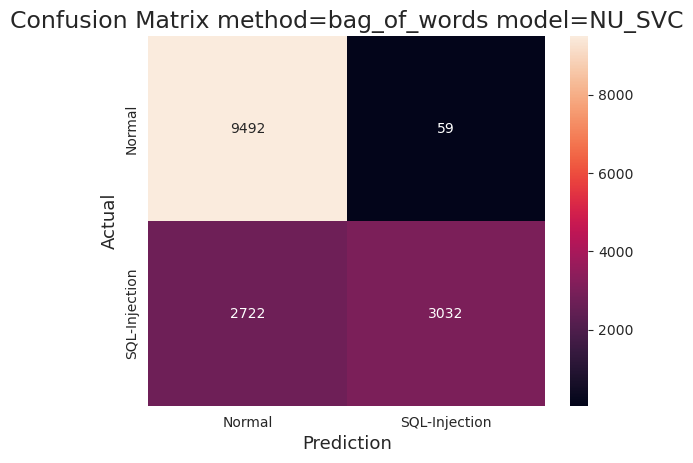

Accuracy: 0.9800
Количество:
• легитимных текстов: 99
• SQL-инъекций: 5547
• ложных срабатываний: 99
• пропущенных SQL-инъекций: 207


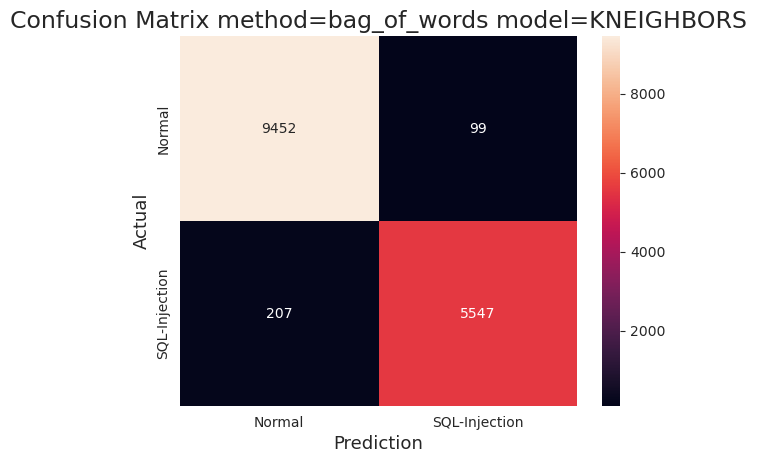

Accuracy: 0.9515
Количество:
• легитимных текстов: 132
• SQL-инъекций: 5144
• ложных срабатываний: 132
• пропущенных SQL-инъекций: 610


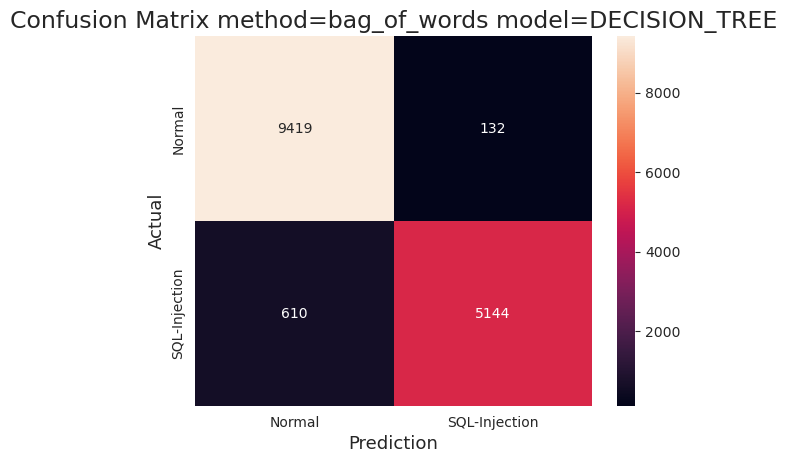

Accuracy: 0.9437
Количество:
• легитимных текстов: 173
• SQL-инъекций: 5066
• ложных срабатываний: 173
• пропущенных SQL-инъекций: 688


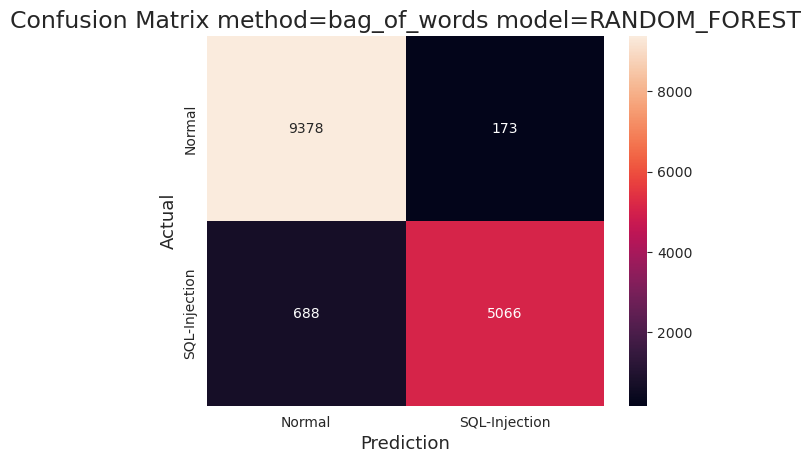

Accuracy: 0.9548
Количество:
• легитимных текстов: 200
• SQL-инъекций: 5262
• ложных срабатываний: 200
• пропущенных SQL-инъекций: 492


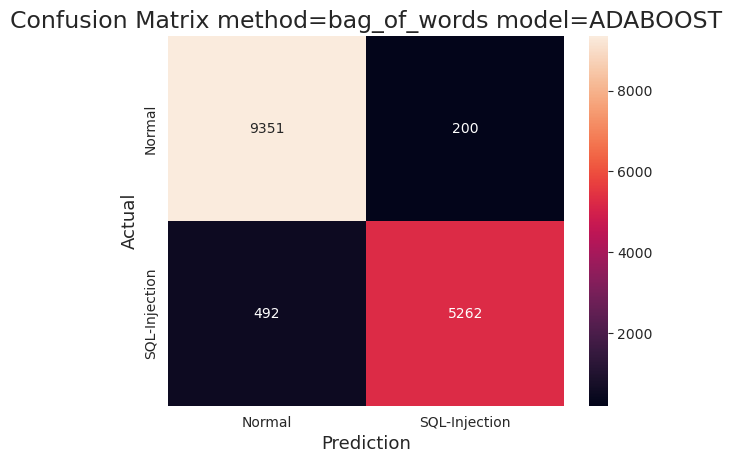

Accuracy: 0.9721
Количество:
• легитимных текстов: 75
• SQL-инъекций: 5402
• ложных срабатываний: 75
• пропущенных SQL-инъекций: 352


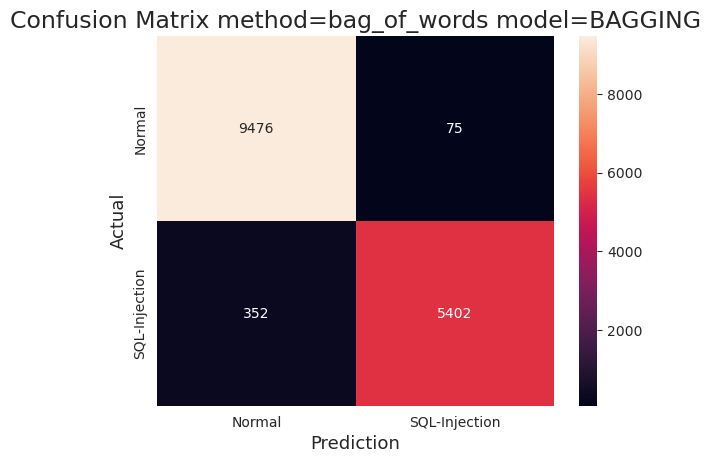

Accuracy: 0.9816
Количество:
• легитимных текстов: 93
• SQL-инъекций: 5565
• ложных срабатываний: 93
• пропущенных SQL-инъекций: 189


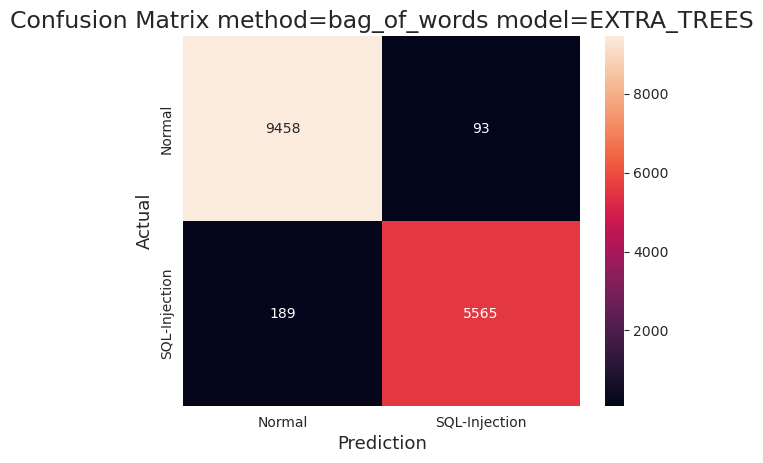

Accuracy: 0.8810
Количество:
• легитимных текстов: 230
• SQL-инъекций: 4163
• ложных срабатываний: 230
• пропущенных SQL-инъекций: 1591


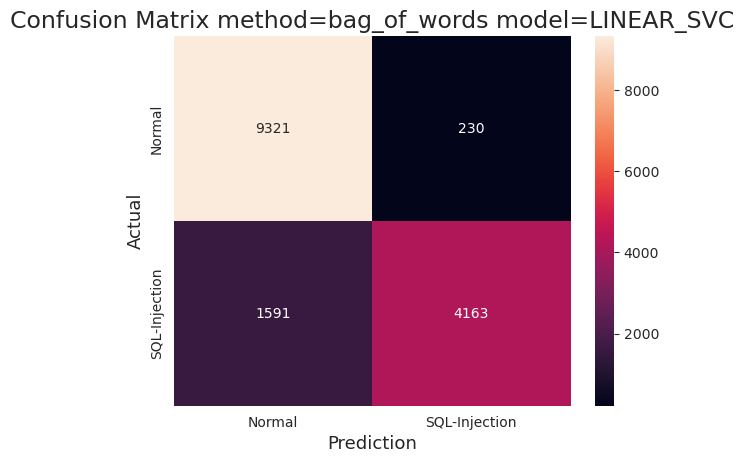

Accuracy: 0.9664
Количество:
• легитимных текстов: 267
• SQL-инъекций: 5506
• ложных срабатываний: 267
• пропущенных SQL-инъекций: 248


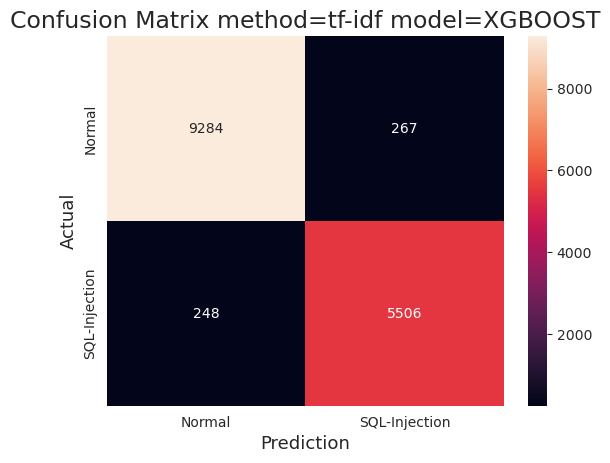

Accuracy: 0.9143
Количество:
• легитимных текстов: 177
• SQL-инъекций: 4620
• ложных срабатываний: 177
• пропущенных SQL-инъекций: 1134


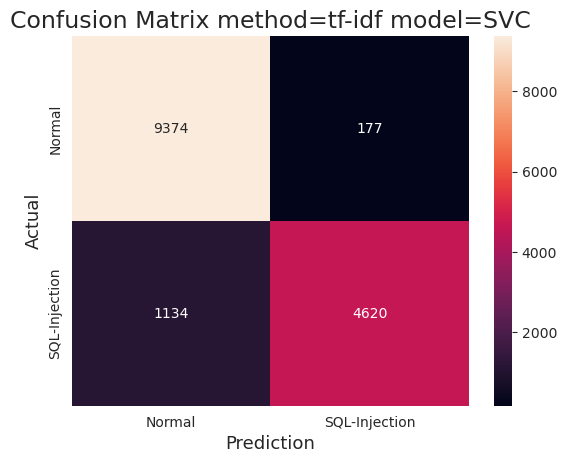

Accuracy: 0.8193
Количество:
• легитимных текстов: 100
• SQL-инъекций: 3089
• ложных срабатываний: 100
• пропущенных SQL-инъекций: 2665


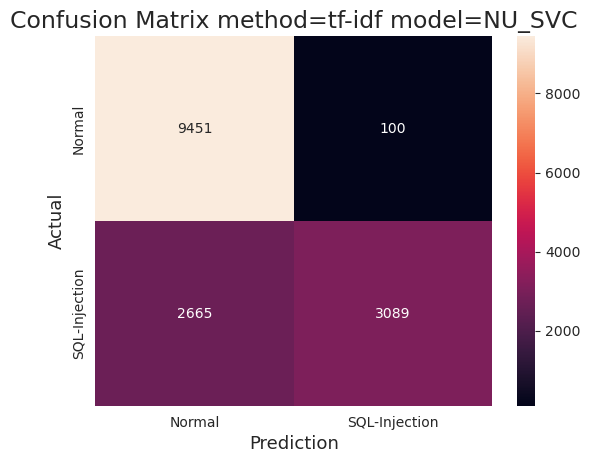

Accuracy: 0.9816
Количество:
• легитимных текстов: 131
• SQL-инъекций: 5604
• ложных срабатываний: 131
• пропущенных SQL-инъекций: 150


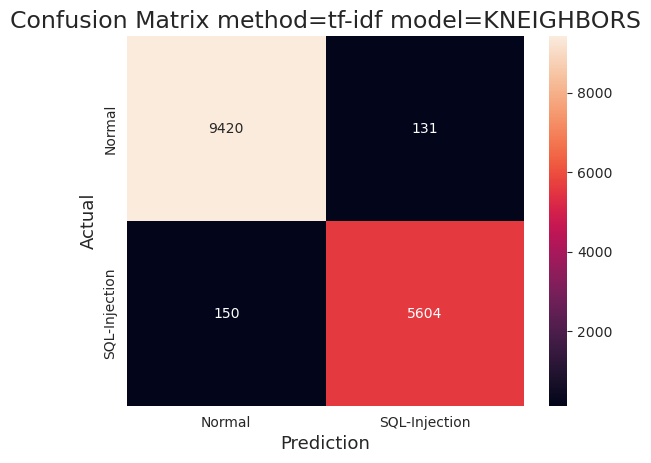

Accuracy: 0.9181
Количество:
• легитимных текстов: 590
• SQL-инъекций: 5090
• ложных срабатываний: 590
• пропущенных SQL-инъекций: 664


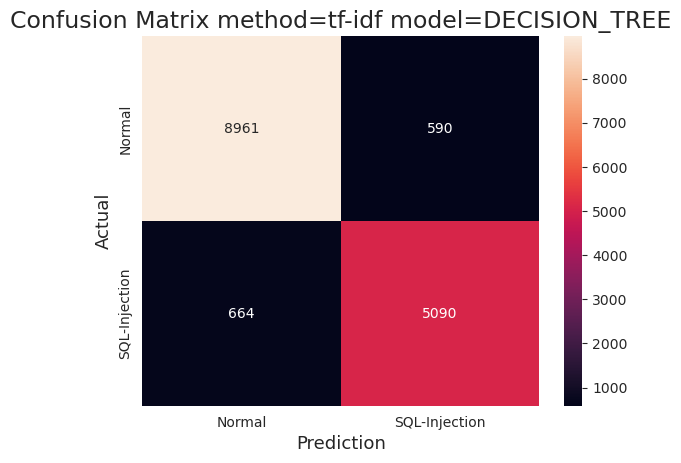

Accuracy: 0.9543
Количество:
• легитимных текстов: 318
• SQL-инъекций: 5372
• ложных срабатываний: 318
• пропущенных SQL-инъекций: 382


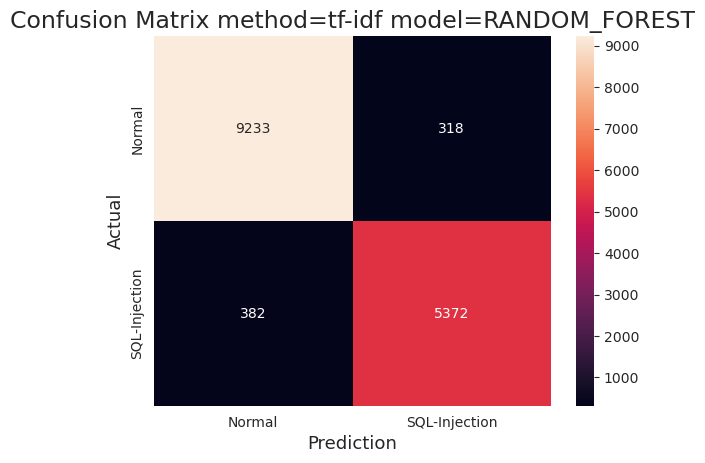

Accuracy: 0.9569
Количество:
• легитимных текстов: 313
• SQL-инъекций: 5408
• ложных срабатываний: 313
• пропущенных SQL-инъекций: 346


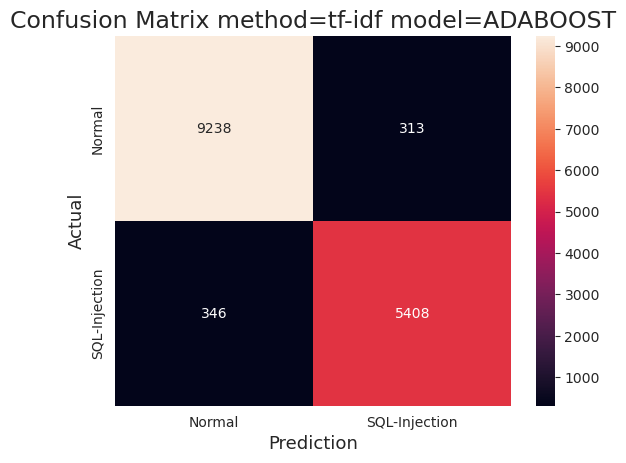

Accuracy: 0.9641
Количество:
• легитимных текстов: 299
• SQL-инъекций: 5504
• ложных срабатываний: 299
• пропущенных SQL-инъекций: 250


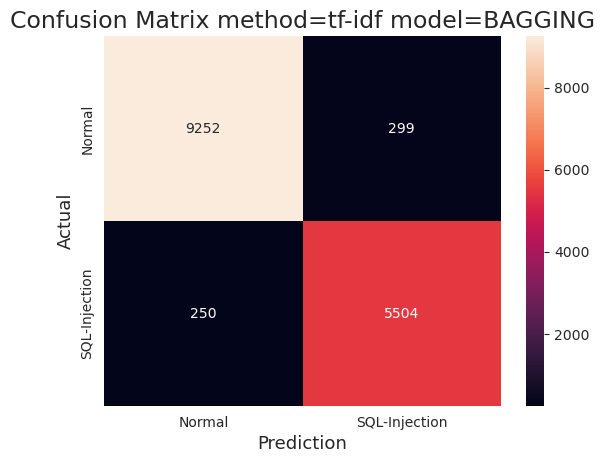

Accuracy: 0.9621
Количество:
• легитимных текстов: 273
• SQL-инъекций: 5447
• ложных срабатываний: 273
• пропущенных SQL-инъекций: 307


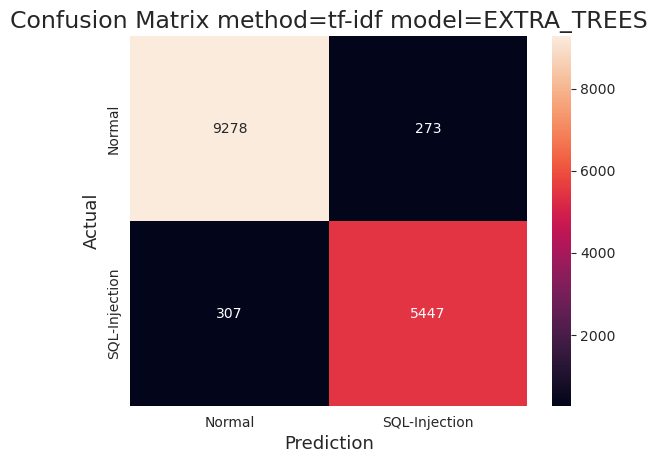

Accuracy: 0.8815
Количество:
• легитимных текстов: 125
• SQL-инъекций: 4066
• ложных срабатываний: 125
• пропущенных SQL-инъекций: 1688


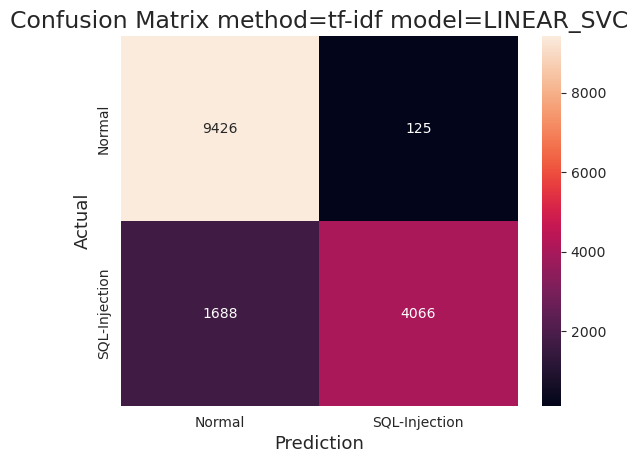

Accuracy: 0.9762
Количество:
• легитимных текстов: 143
• SQL-инъекций: 5533
• ложных срабатываний: 143
• пропущенных SQL-инъекций: 221


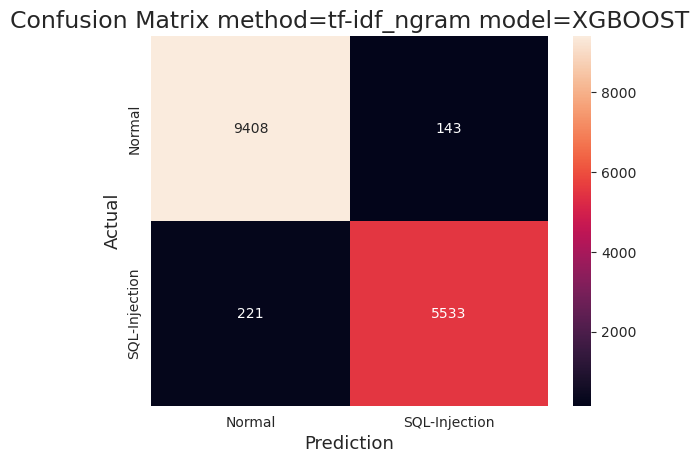

Accuracy: 0.9868
Количество:
• легитимных текстов: 70
• SQL-инъекций: 5622
• ложных срабатываний: 70
• пропущенных SQL-инъекций: 132


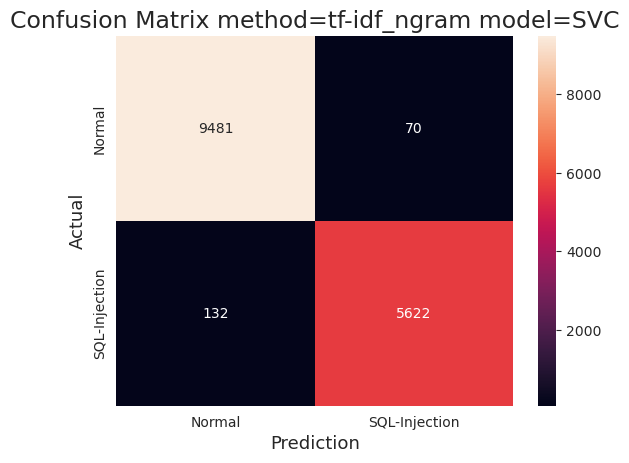

Accuracy: 0.9635
Количество:
• легитимных текстов: 15
• SQL-инъекций: 5211
• ложных срабатываний: 15
• пропущенных SQL-инъекций: 543


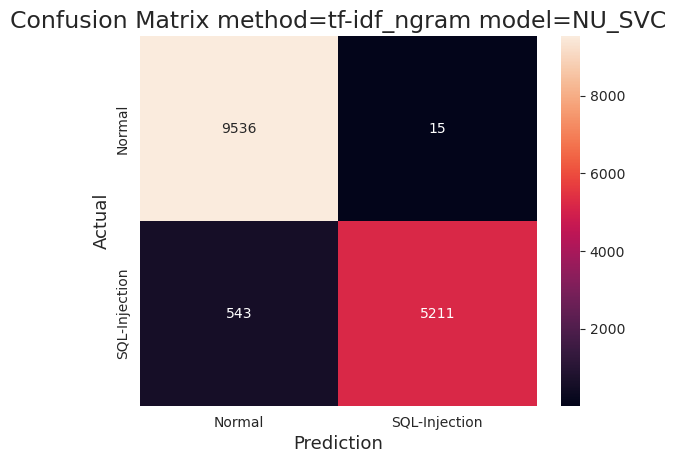

Accuracy: 0.9941
Количество:
• легитимных текстов: 21
• SQL-инъекций: 5684
• ложных срабатываний: 21
• пропущенных SQL-инъекций: 70


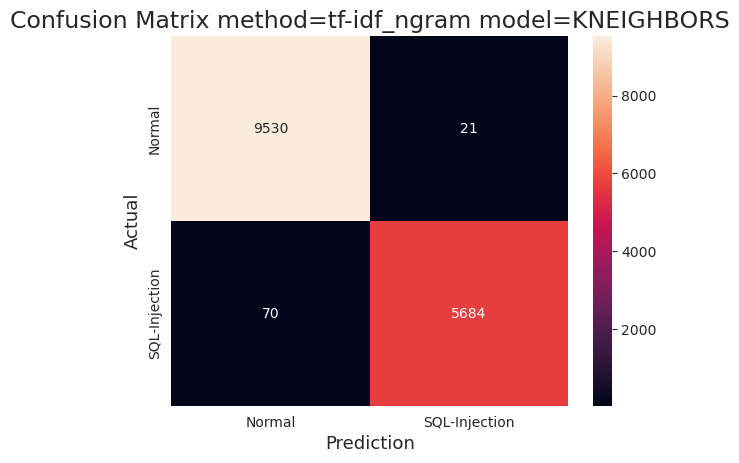

Accuracy: 0.9770
Количество:
• легитимных текстов: 107
• SQL-инъекций: 5509
• ложных срабатываний: 107
• пропущенных SQL-инъекций: 245


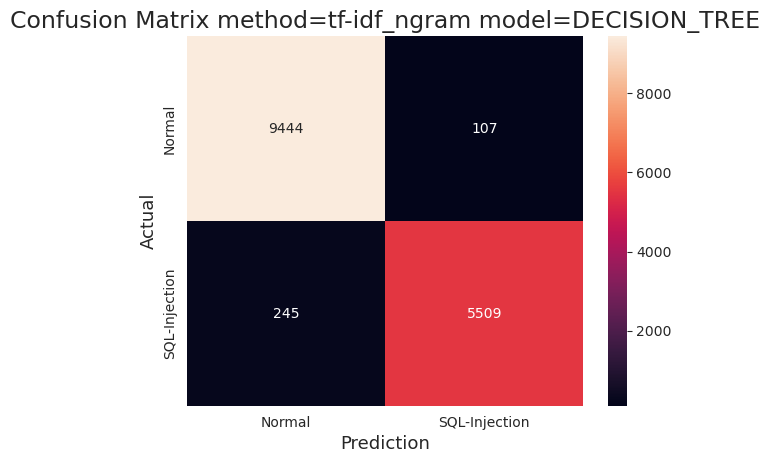

Accuracy: 0.9809
Количество:
• легитимных текстов: 123
• SQL-инъекций: 5584
• ложных срабатываний: 123
• пропущенных SQL-инъекций: 170


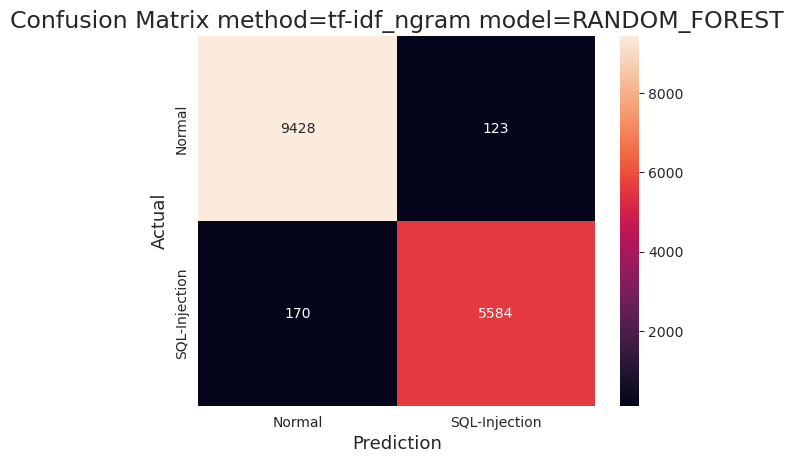

Accuracy: 0.9848
Количество:
• легитимных текстов: 84
• SQL-инъекций: 5605
• ложных срабатываний: 84
• пропущенных SQL-инъекций: 149


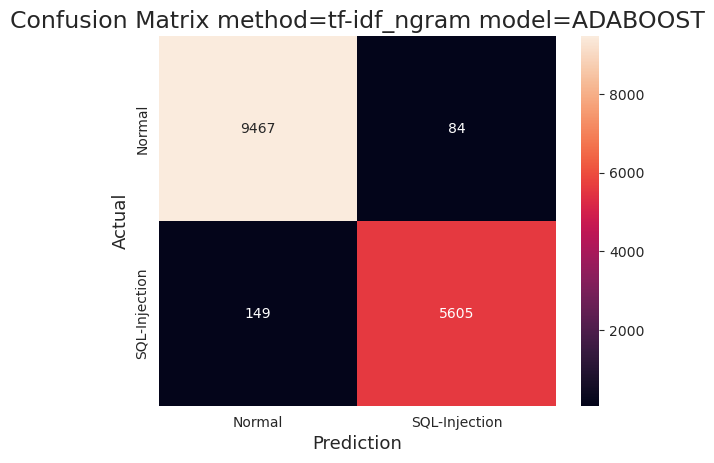

Accuracy: 0.9877
Количество:
• легитимных текстов: 54
• SQL-инъекций: 5620
• ложных срабатываний: 54
• пропущенных SQL-инъекций: 134


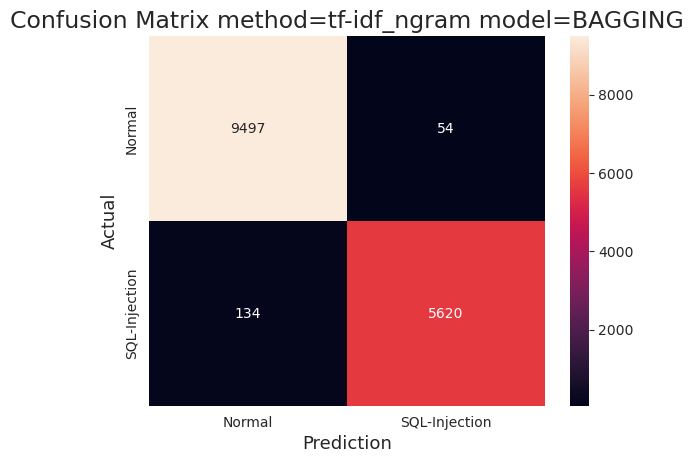

Accuracy: 0.9907
Количество:
• легитимных текстов: 47
• SQL-инъекций: 5659
• ложных срабатываний: 47
• пропущенных SQL-инъекций: 95


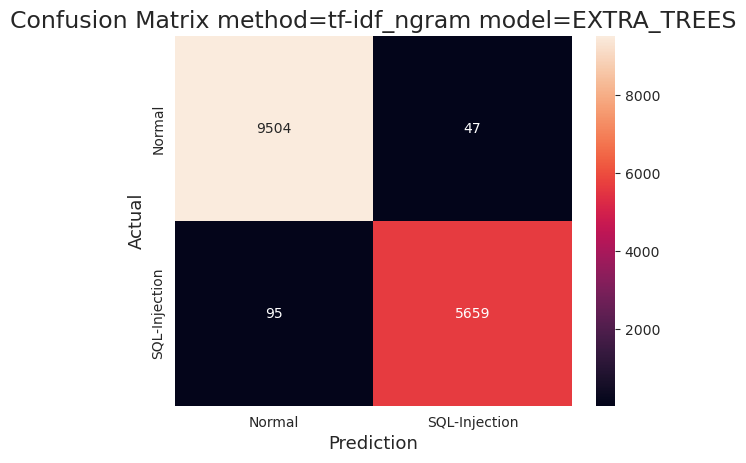

Accuracy: 0.9882
Количество:
• легитимных текстов: 60
• SQL-инъекций: 5633
• ложных срабатываний: 60
• пропущенных SQL-инъекций: 121


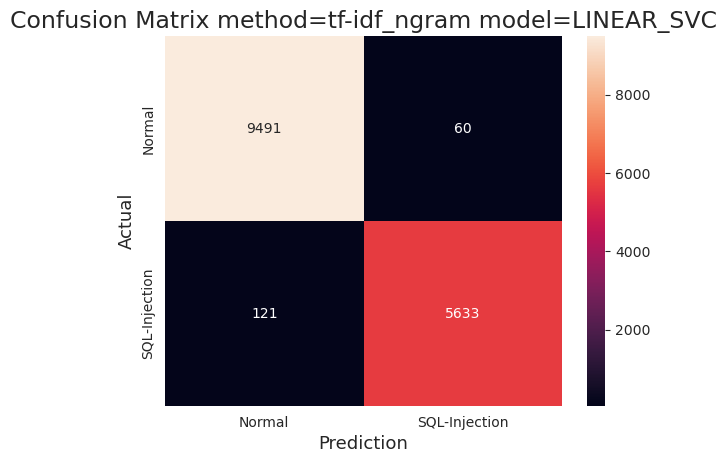

In [23]:
# Применяем обученную модель для предсказания на тестовых данных.
for method in methods:

    for model_name in models_dict.keys():
        # Прогнозирование на тестовых данных
        y_pred = classifier[method][model_name].predict(x_test_model[method][model_name])
        # Вычисление accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Выводим точность
        info_accuracy(y_test, y_pred)
        #cm = confusion_matrix(y_test, y_pred)

        # Визуализация матрицы ошибок с использованием heatmap
        plot_confusion_matrix(y_expect=y_test, y_pred=y_pred, method=method, model=model_name)


#### Accuracy — это полезная метрика для измерения общей точности классификатора.
Матрица ошибок позволяет более детально понять, где именно модель ошибается и как она классифицирует объекты по разным классам.

### 6. Загрузим тестовый датасет `test-dataset.tsv` при помощи модуля `pandas`:

In [27]:
from sklearn.metrics import accuracy_score, classification_report
# Функция для тестирования всех комбинаций моделей и векторизаторов
def test_models_and_vectorizers(x_test_data, y_test_data, _methods, models_to_test):
    results = []
    # Перебираем все методы векторизации
    for vectorizer_method in _methods:
        # Получаем объект векторизатора
        vectorizer = extractors[vectorizer_method]

        # Преобразуем данные
        x_test_vect = vectorizer.extract_features(x_test_data)
        x_test_reduced_vect = selectors[vectorizer_method].fit_transform(x_test_vect, y_test_data)
        # Перебираем все модели
        for _model_name in models_to_test.keys():
            print(f"Метод векторизации {vectorizer_method} Модель {_model_name}")
            # Обучение модели на выбранных признаках
            x_test_vect_model = selector[vectorizer_method][_model_name].transform(x_test_reduced_vect)
            # Предсказываем на тестовых данных
            y_pred_data = classifier[vectorizer_method][_model_name].predict(x_test_vect_model)
            #y_pred_data = classifier[vectorizer_method][_model_name].predict(x_test_reduced_vect)

            # Оцениваем производительность модели
            info_accuracy(y_test_data, y_pred_data)

            # Визуализация матрицы ошибок с использованием heatmap
            plot_confusion_matrix(y_expect=y_test_data, y_pred=y_pred_data, method=vectorizer_method, model=_model_name)

            # Сохраняем результаты
            results.append({
                "vectorizer": vectorizer_method,
                "model": _model_name,
                "accuracy": accuracy_score(y_test_data, y_pred_data),
                "report": classification_report(y_test_data, y_pred_data, output_dict=True),
            })

    return pd.DataFrame(results)

In [25]:
test_df = pd.read_csv('datasets/test-dataset.csv')
test_x = test_df['payload'].values
test_y = test_df['label'].values

Метод векторизации bag_of_characters Модель XGBOOST
Accuracy: 0.7014
Количество:
• легитимных текстов: 6752
• SQL-инъекций: 8599
• ложных срабатываний: 6752
• пропущенных SQL-инъекций: 2253


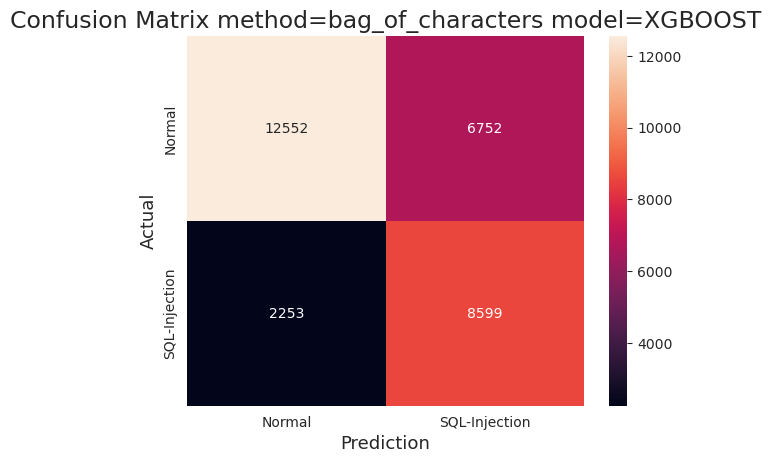

Метод векторизации bag_of_characters Модель SVC
Accuracy: 0.7262
Количество:
• легитимных текстов: 4862
• SQL-инъекций: 7458
• ложных срабатываний: 4862
• пропущенных SQL-инъекций: 3394


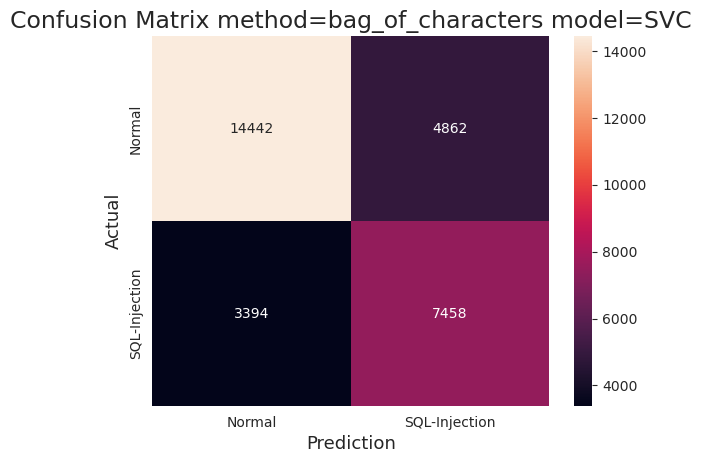

Метод векторизации bag_of_characters Модель NU_SVC
Accuracy: 0.7985
Количество:
• легитимных текстов: 1049
• SQL-инъекций: 5825
• ложных срабатываний: 1049
• пропущенных SQL-инъекций: 5027


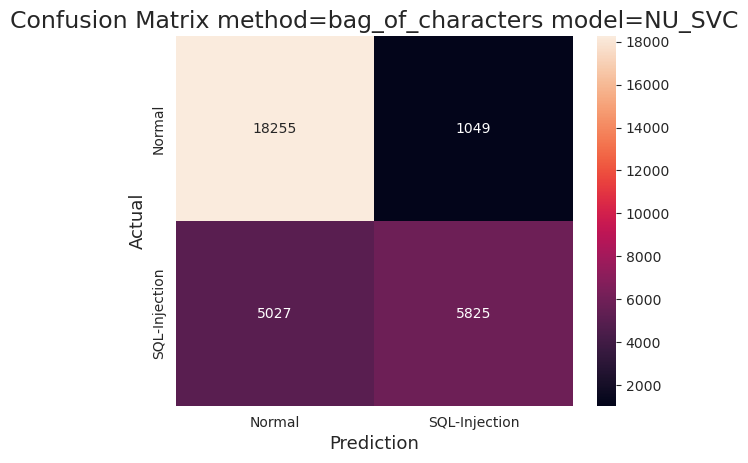

Метод векторизации bag_of_characters Модель KNEIGHBORS
Accuracy: 0.7069
Количество:
• легитимных текстов: 5679
• SQL-инъекций: 7691
• ложных срабатываний: 5679
• пропущенных SQL-инъекций: 3161


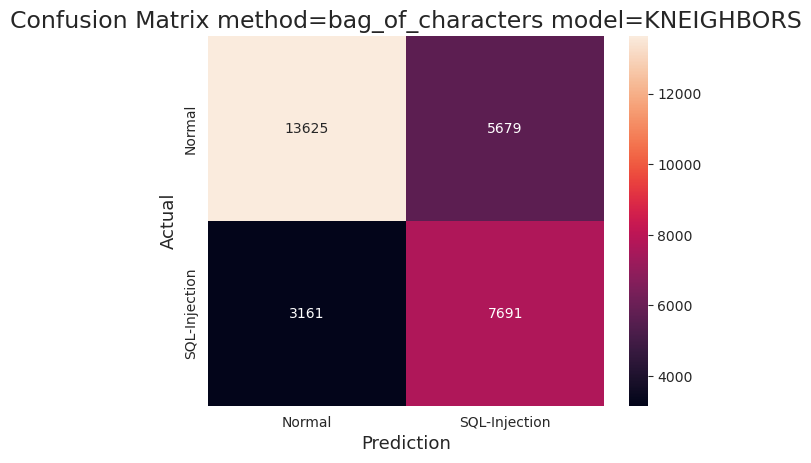

Метод векторизации bag_of_characters Модель DECISION_TREE
Accuracy: 0.6772
Количество:
• легитимных текстов: 5419
• SQL-инъекций: 6536
• ложных срабатываний: 5419
• пропущенных SQL-инъекций: 4316


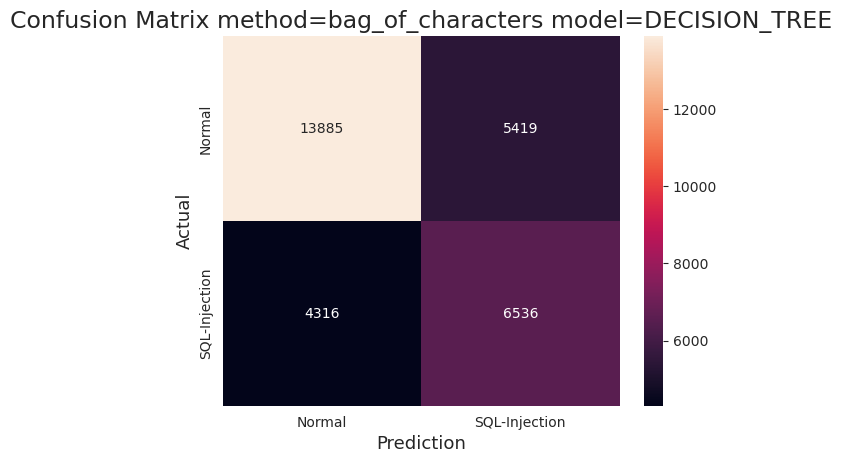

Метод векторизации bag_of_characters Модель RANDOM_FOREST
Accuracy: 0.7074
Количество:
• легитимных текстов: 5073
• SQL-инъекций: 7101
• ложных срабатываний: 5073
• пропущенных SQL-инъекций: 3751


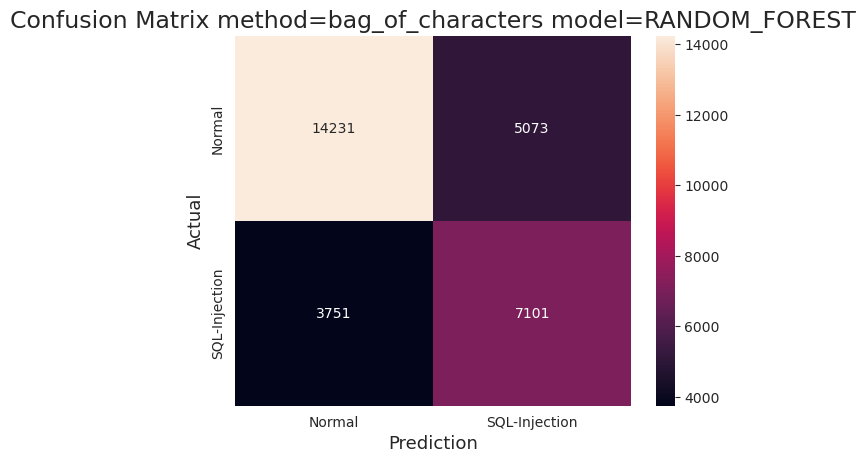

Метод векторизации bag_of_characters Модель ADABOOST
Accuracy: 0.7046
Количество:
• легитимных текстов: 5318
• SQL-инъекций: 7263
• ложных срабатываний: 5318
• пропущенных SQL-инъекций: 3589


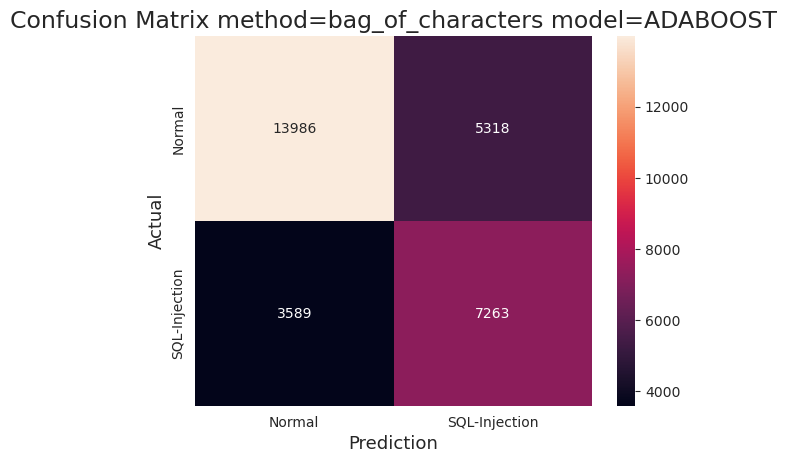

Метод векторизации bag_of_characters Модель BAGGING
Accuracy: 0.6971
Количество:
• легитимных текстов: 6185
• SQL-инъекций: 7902
• ложных срабатываний: 6185
• пропущенных SQL-инъекций: 2950


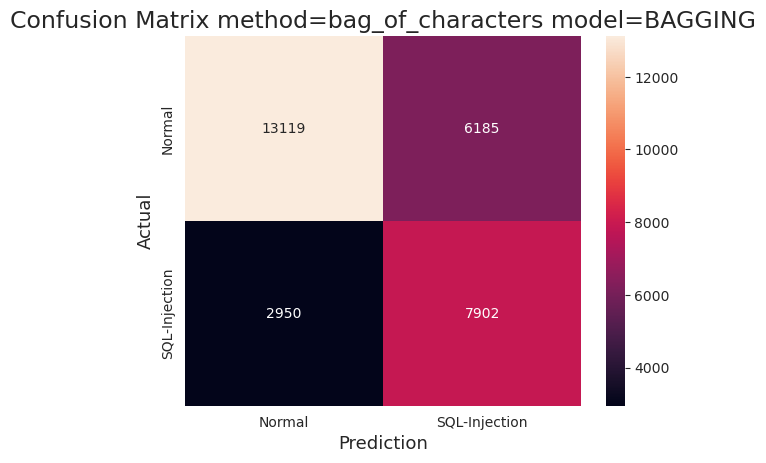

Метод векторизации bag_of_characters Модель EXTRA_TREES
Accuracy: 0.7129
Количество:
• легитимных текстов: 5904
• SQL-инъекций: 8097
• ложных срабатываний: 5904
• пропущенных SQL-инъекций: 2755


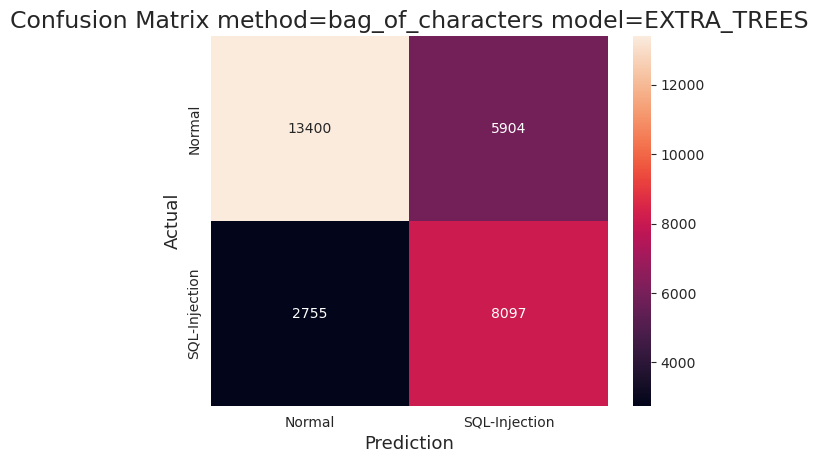

Метод векторизации bag_of_characters Модель LINEAR_SVC
Accuracy: 0.7389
Количество:
• легитимных текстов: 4494
• SQL-инъекций: 7471
• ложных срабатываний: 4494
• пропущенных SQL-инъекций: 3381


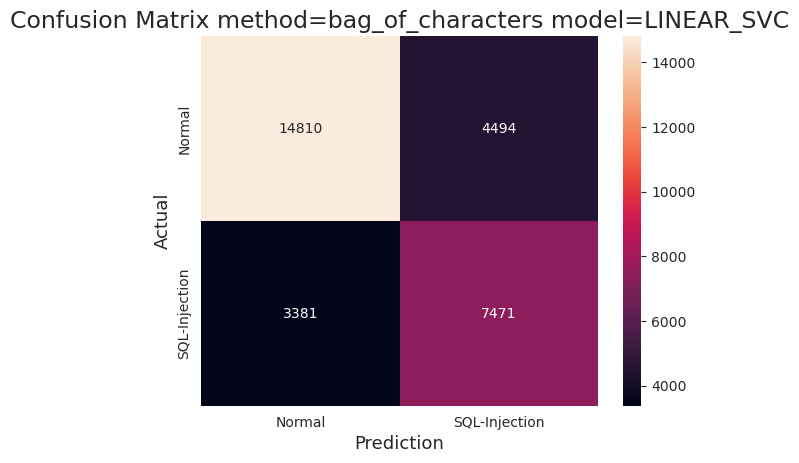

Метод векторизации bag_of_words Модель XGBOOST
Accuracy: 0.8997
Количество:
• легитимных текстов: 598
• SQL-инъекций: 8426
• ложных срабатываний: 598
• пропущенных SQL-инъекций: 2426


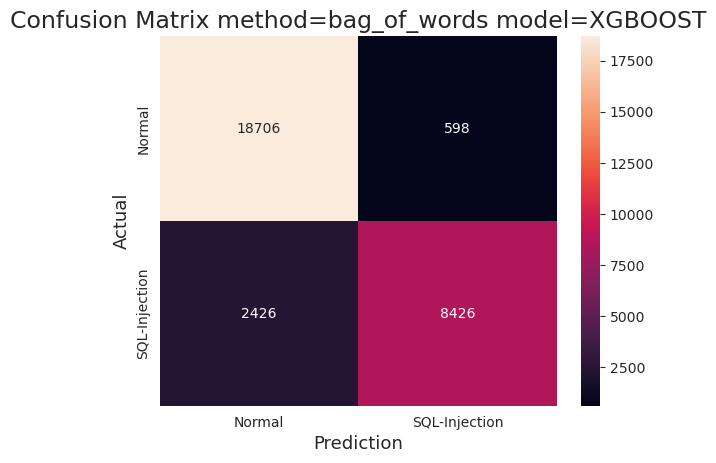

Метод векторизации bag_of_words Модель SVC
Accuracy: 0.9205
Количество:
• легитимных текстов: 147
• SQL-инъекций: 8601
• ложных срабатываний: 147
• пропущенных SQL-инъекций: 2251


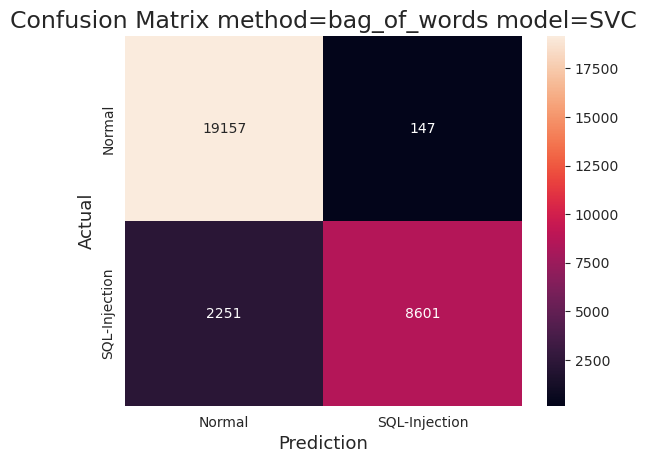

Метод векторизации bag_of_words Модель NU_SVC
Accuracy: 0.8074
Количество:
• легитимных текстов: 108
• SQL-инъекций: 5152
• ложных срабатываний: 108
• пропущенных SQL-инъекций: 5700


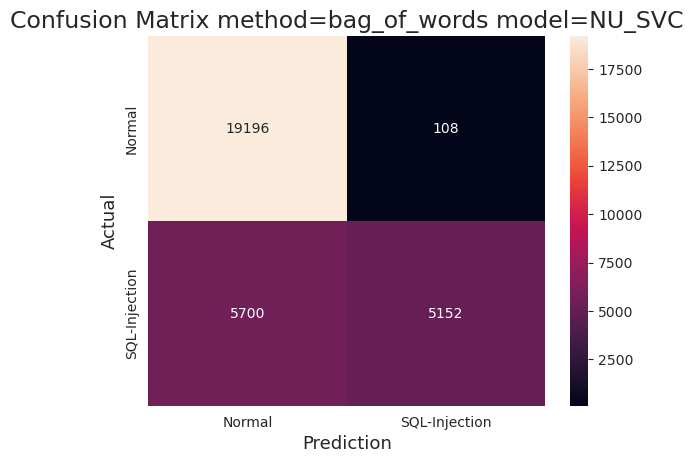

Метод векторизации bag_of_words Модель KNEIGHBORS
Accuracy: 0.9370
Количество:
• легитимных текстов: 306
• SQL-инъекций: 9258
• ложных срабатываний: 306
• пропущенных SQL-инъекций: 1594


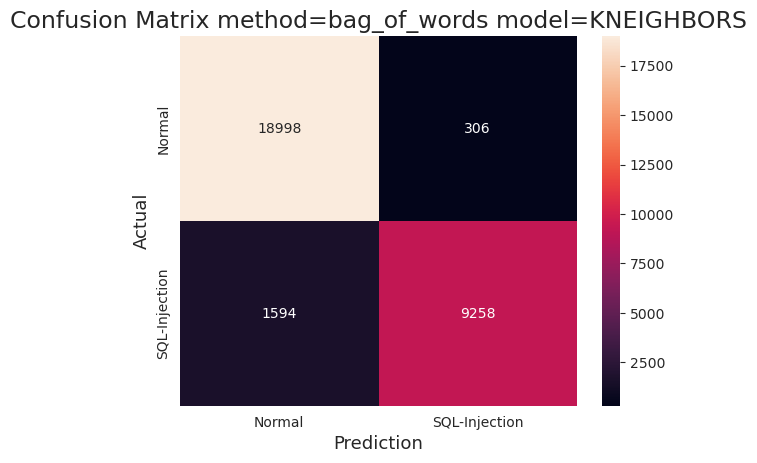

Метод векторизации bag_of_words Модель DECISION_TREE
Accuracy: 0.8154
Количество:
• легитимных текстов: 545
• SQL-инъекций: 5830
• ложных срабатываний: 545
• пропущенных SQL-инъекций: 5022


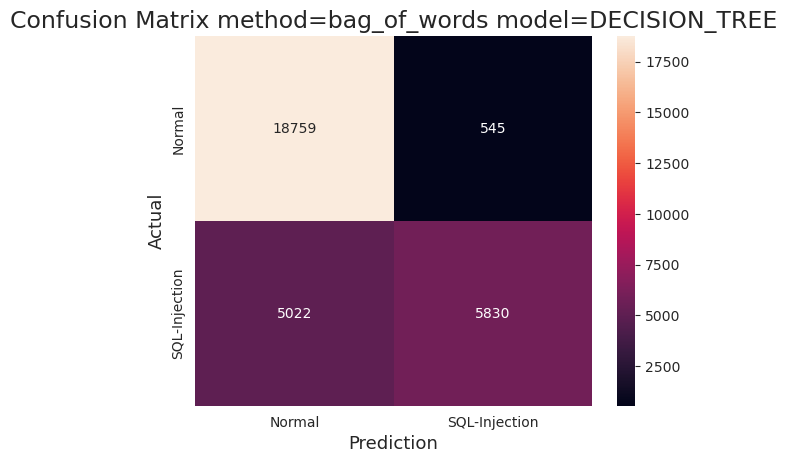

Метод векторизации bag_of_words Модель RANDOM_FOREST
Accuracy: 0.9385
Количество:
• легитимных текстов: 180
• SQL-инъекций: 9178
• ложных срабатываний: 180
• пропущенных SQL-инъекций: 1674


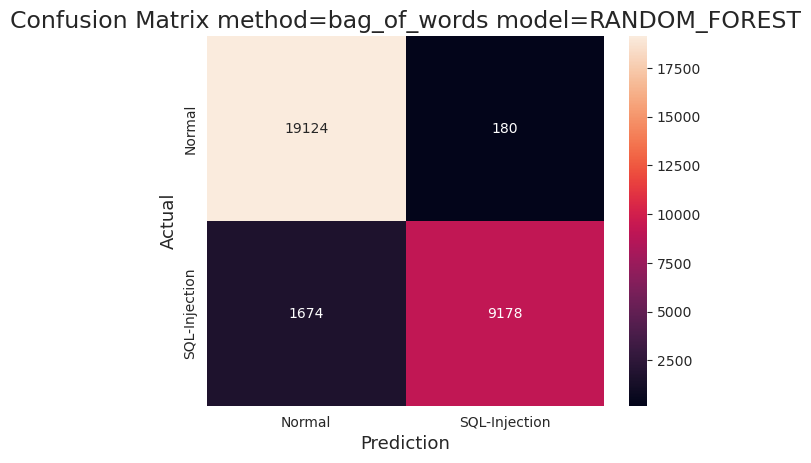

Метод векторизации bag_of_words Модель ADABOOST
Accuracy: 0.9746
Количество:
• легитимных текстов: 260
• SQL-инъекций: 10345
• ложных срабатываний: 260
• пропущенных SQL-инъекций: 507


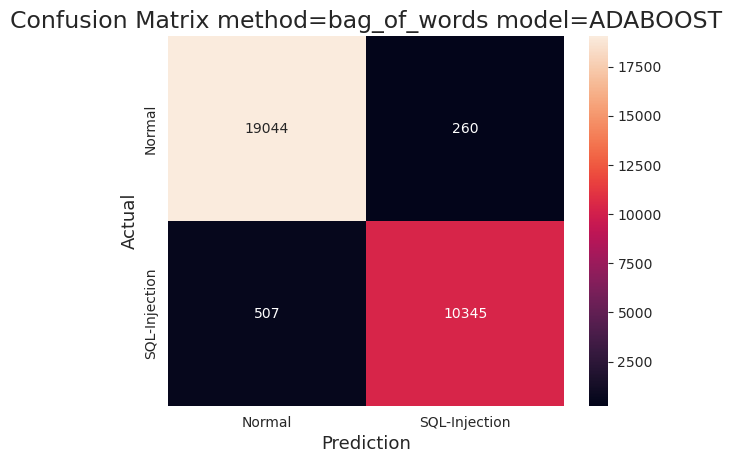

Метод векторизации bag_of_words Модель BAGGING
Accuracy: 0.8334
Количество:
• легитимных текстов: 190
• SQL-инъекций: 6019
• ложных срабатываний: 190
• пропущенных SQL-инъекций: 4833


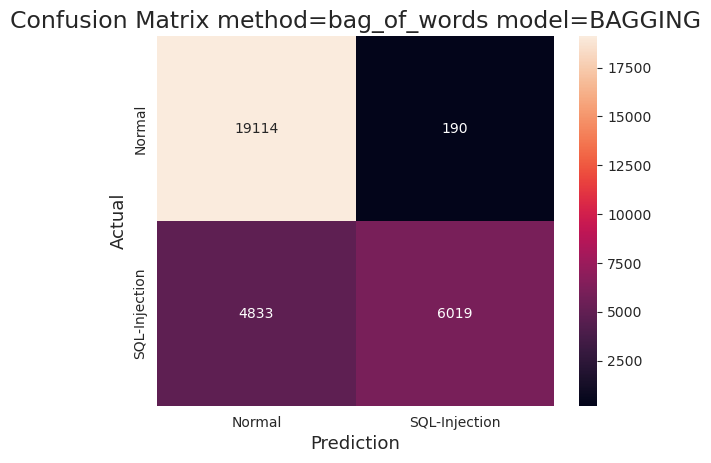

Метод векторизации bag_of_words Модель EXTRA_TREES
Accuracy: 0.9074
Количество:
• легитимных текстов: 154
• SQL-инъекций: 8215
• ложных срабатываний: 154
• пропущенных SQL-инъекций: 2637


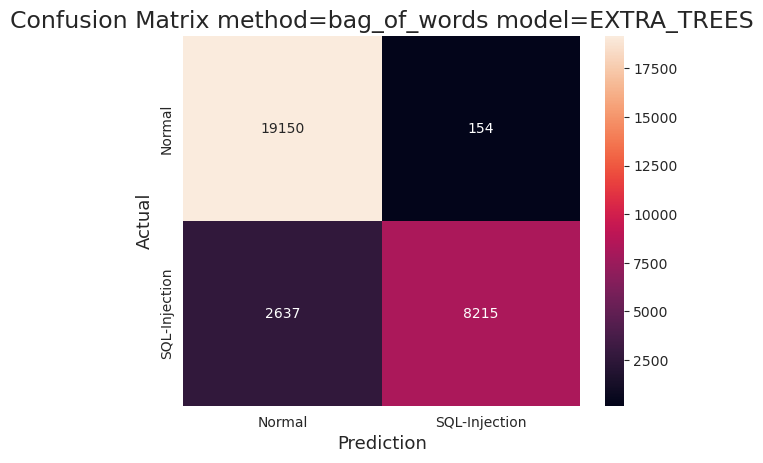

Метод векторизации bag_of_words Модель LINEAR_SVC
Accuracy: 0.9341
Количество:
• легитимных текстов: 141
• SQL-инъекций: 9005
• ложных срабатываний: 141
• пропущенных SQL-инъекций: 1847


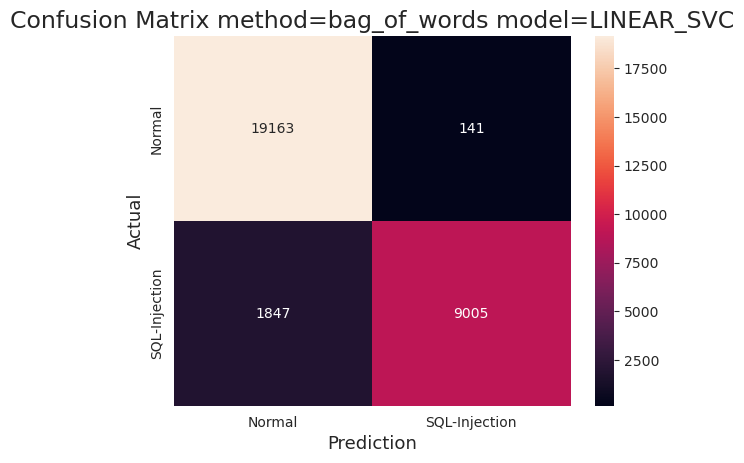

Метод векторизации tf-idf Модель XGBOOST
Accuracy: 0.9677
Количество:
• легитимных текстов: 849
• SQL-инъекций: 10728
• ложных срабатываний: 849
• пропущенных SQL-инъекций: 124


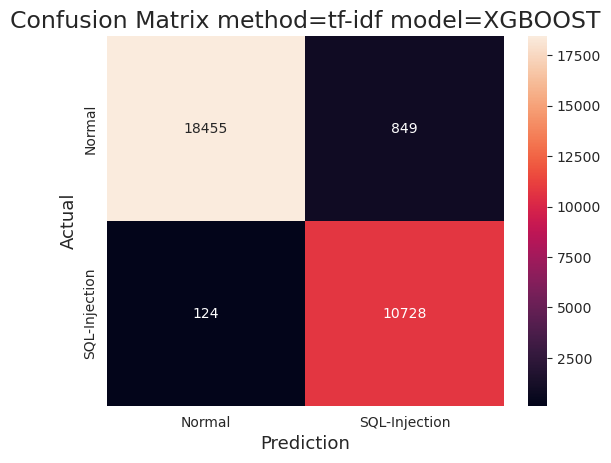

Метод векторизации tf-idf Модель SVC
Accuracy: 0.9522
Количество:
• легитимных текстов: 226
• SQL-инъекций: 9637
• ложных срабатываний: 226
• пропущенных SQL-инъекций: 1215


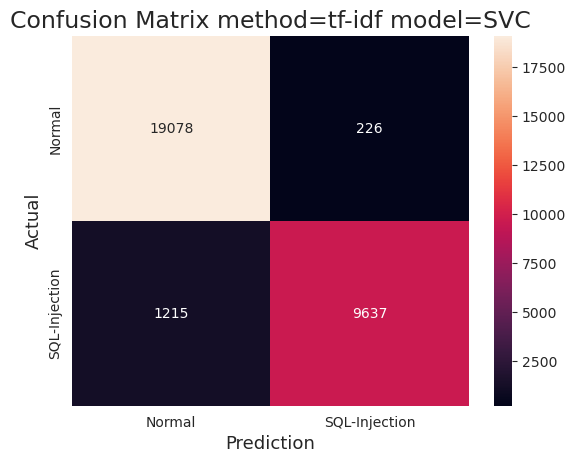

Метод векторизации tf-idf Модель NU_SVC
Accuracy: 0.9021
Количество:
• легитимных текстов: 31
• SQL-инъекций: 7930
• ложных срабатываний: 31
• пропущенных SQL-инъекций: 2922


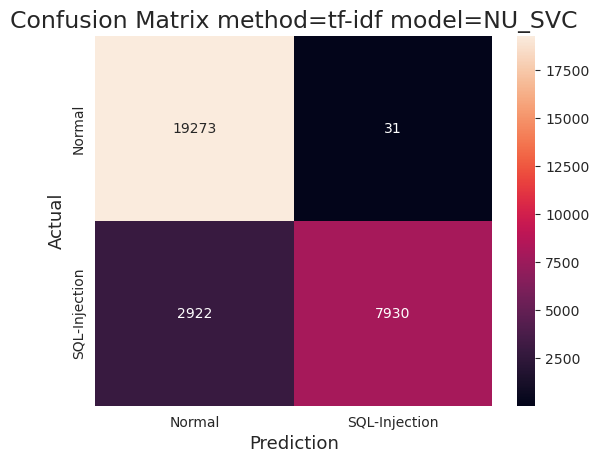

Метод векторизации tf-idf Модель KNEIGHBORS
Accuracy: 0.8239
Количество:
• легитимных текстов: 2015
• SQL-инъекций: 7556
• ложных срабатываний: 2015
• пропущенных SQL-инъекций: 3296


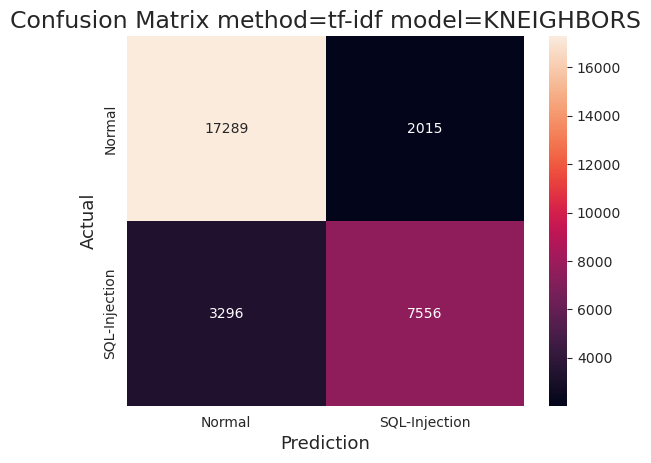

Метод векторизации tf-idf Модель DECISION_TREE
Accuracy: 0.8878
Количество:
• легитимных текстов: 256
• SQL-инъекций: 7725
• ложных срабатываний: 256
• пропущенных SQL-инъекций: 3127


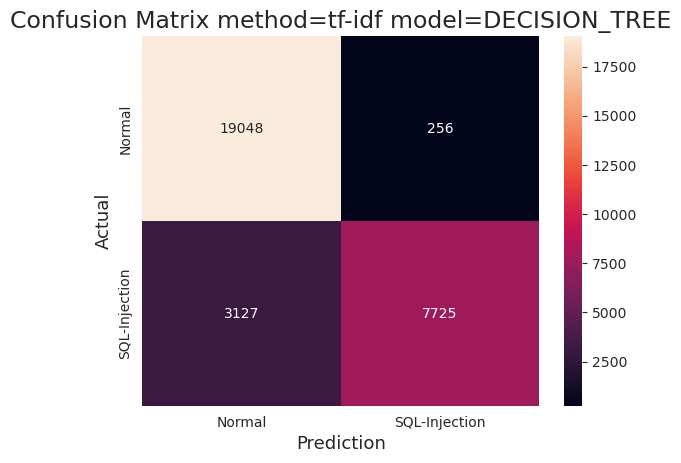

Метод векторизации tf-idf Модель RANDOM_FOREST
Accuracy: 0.9318
Количество:
• легитимных текстов: 653
• SQL-инъекций: 9448
• ложных срабатываний: 653
• пропущенных SQL-инъекций: 1404


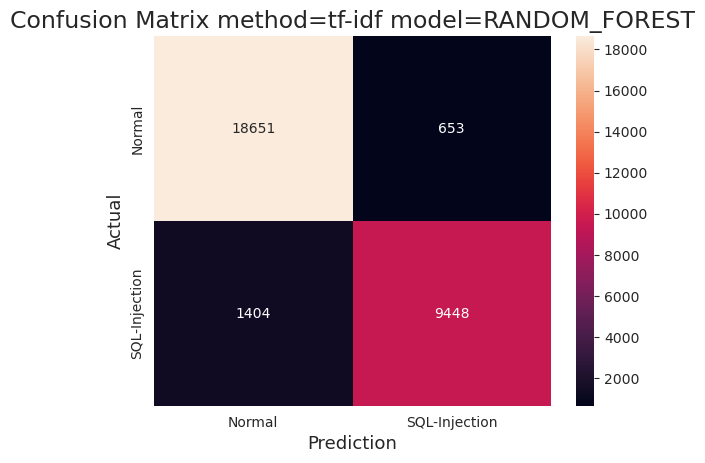

Метод векторизации tf-idf Модель ADABOOST
Accuracy: 0.9441
Количество:
• легитимных текстов: 408
• SQL-инъекций: 9574
• ложных срабатываний: 408
• пропущенных SQL-инъекций: 1278


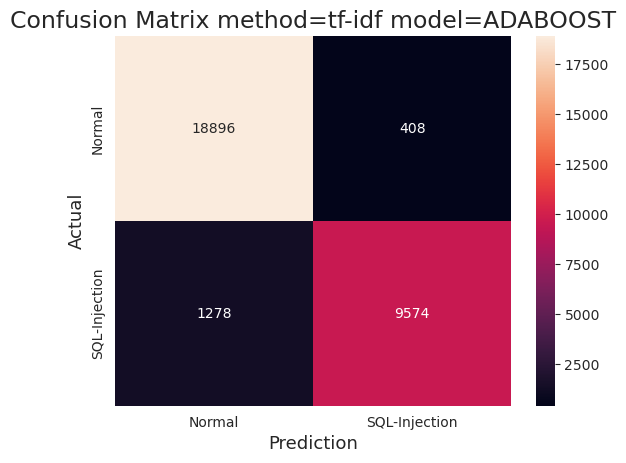

Метод векторизации tf-idf Модель BAGGING
Accuracy: 0.8821
Количество:
• легитимных текстов: 2265
• SQL-инъекций: 9561
• ложных срабатываний: 2265
• пропущенных SQL-инъекций: 1291


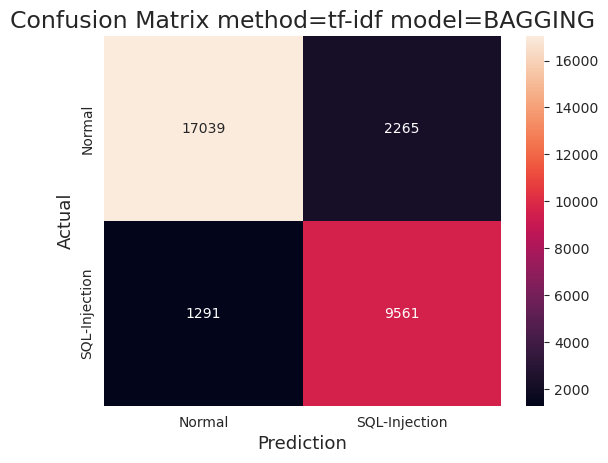

Метод векторизации tf-idf Модель EXTRA_TREES
Accuracy: 0.9311
Количество:
• легитимных текстов: 696
• SQL-инъекций: 9471
• ложных срабатываний: 696
• пропущенных SQL-инъекций: 1381


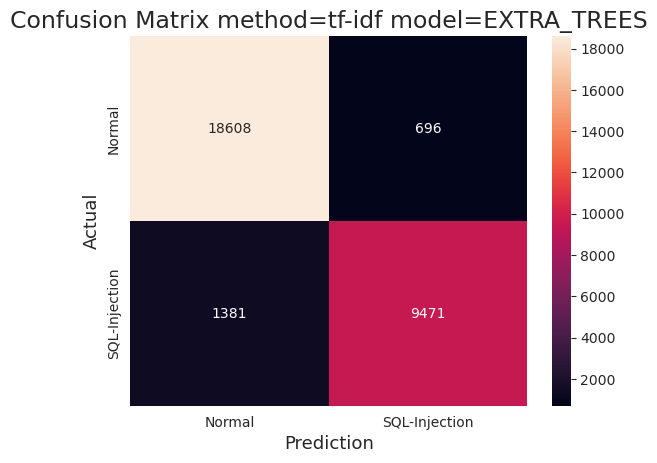

Метод векторизации tf-idf Модель LINEAR_SVC
Accuracy: 0.9439
Количество:
• легитимных текстов: 83
• SQL-инъекций: 9242
• ложных срабатываний: 83
• пропущенных SQL-инъекций: 1610


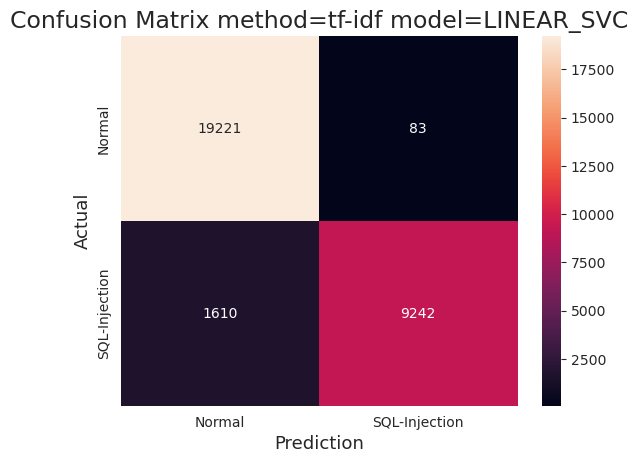

Метод векторизации tf-idf_ngram Модель XGBOOST
Accuracy: 0.8711
Количество:
• легитимных текстов: 2202
• SQL-инъекций: 9167
• ложных срабатываний: 2202
• пропущенных SQL-инъекций: 1685


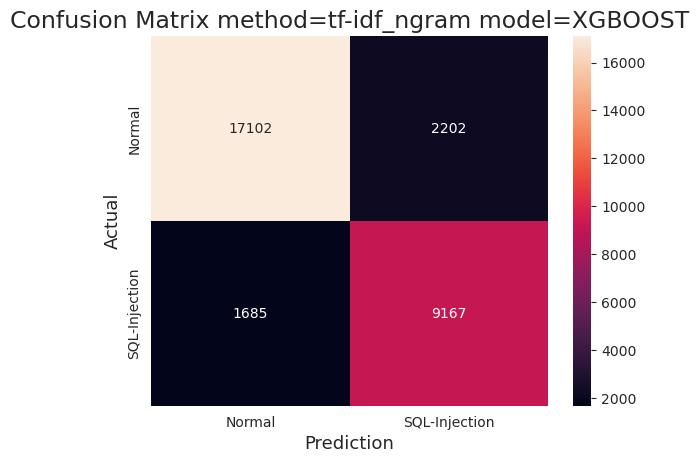

Метод векторизации tf-idf_ngram Модель SVC
Accuracy: 0.8324
Количество:
• легитимных текстов: 77
• SQL-инъекций: 5875
• ложных срабатываний: 77
• пропущенных SQL-инъекций: 4977


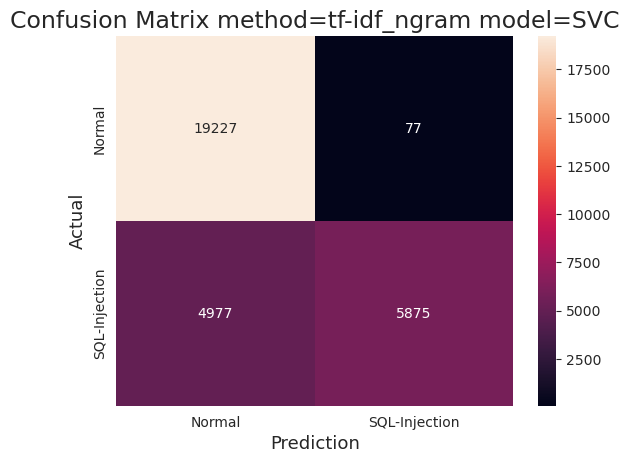

Метод векторизации tf-idf_ngram Модель NU_SVC
Accuracy: 0.8257
Количество:
• легитимных текстов: 4
• SQL-инъекций: 5599
• ложных срабатываний: 4
• пропущенных SQL-инъекций: 5253


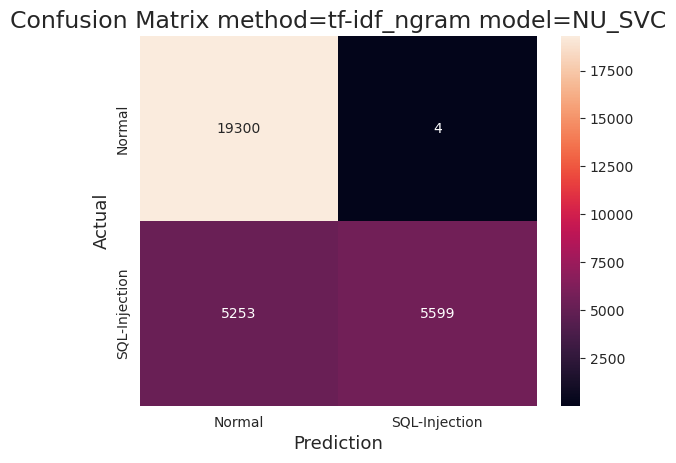

Метод векторизации tf-idf_ngram Модель KNEIGHBORS
Accuracy: 0.8237
Количество:
• легитимных текстов: 1409
• SQL-инъекций: 6945
• ложных срабатываний: 1409
• пропущенных SQL-инъекций: 3907


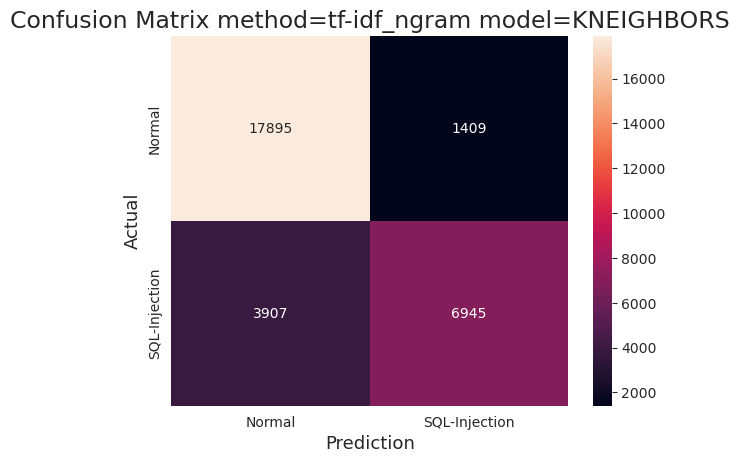

Метод векторизации tf-idf_ngram Модель DECISION_TREE
Accuracy: 0.8436
Количество:
• легитимных текстов: 2152
• SQL-инъекций: 8289
• ложных срабатываний: 2152
• пропущенных SQL-инъекций: 2563


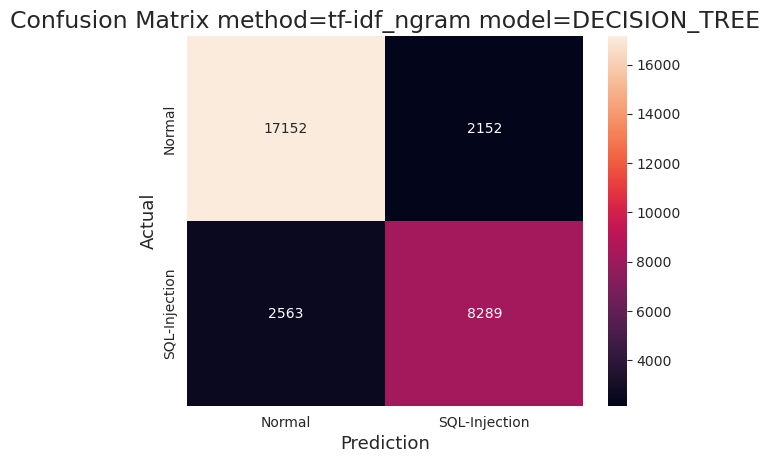

Метод векторизации tf-idf_ngram Модель RANDOM_FOREST
Accuracy: 0.8887
Количество:
• легитимных текстов: 847
• SQL-инъекций: 8343
• ложных срабатываний: 847
• пропущенных SQL-инъекций: 2509


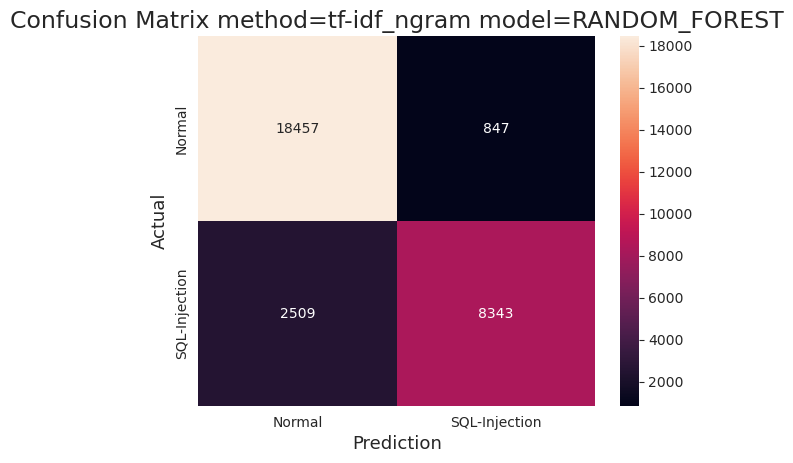

In [ ]:
results_df = test_models_and_vectorizers(test_x, test_y, methods, models_dict)